In [1]:
# Import required package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os.path

In [2]:
#Read the data from csv file and convert them into pandas dataframe
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#to get information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
#to get more information about the numerical data in our dataset
# get min, max, mean, std, quartiles for al the numerical columns/features
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# Create a copy of dataframe df to perform data wrangling 
new_df = df.copy()

In [7]:
# keep track of how many observations
count_observations = len(new_df)

In [8]:
def remove_outliers(column, data):
    #lets remove outliers from the sqft_lot15 column
    q3 = data[column].quantile(0.75)
    q1 = data[column].quantile(0.25)
    iqr = q3-q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    upper_index = data[data[column] >=upper].index
    lower_index = data[data[column] <=lower].index
    data = data.drop(upper_index)
    data = data.drop(lower_index)
    return data

In [9]:
new_df = remove_outliers('price',new_df)
# to see how many observations were dropped 
count_observations-len(new_df)

1146

In [10]:
# keep track of how many observations
count_observations = len(new_df)

In [11]:
# check new min, max, median, and mean of house price
new_df.price.describe()

count    2.046700e+04
mean     4.769846e+05
std      2.083713e+05
min      7.500000e+04
25%      3.150000e+05
50%      4.375000e+05
75%      6.000000e+05
max      1.127500e+06
Name: price, dtype: float64

In [12]:
max(new_df.price)

1127500.0

In [13]:
min(new_df.price)

75000.0

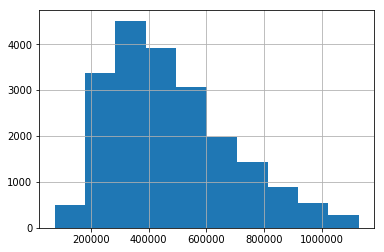

In [14]:
# plot a histogram of price
new_df.price.hist()

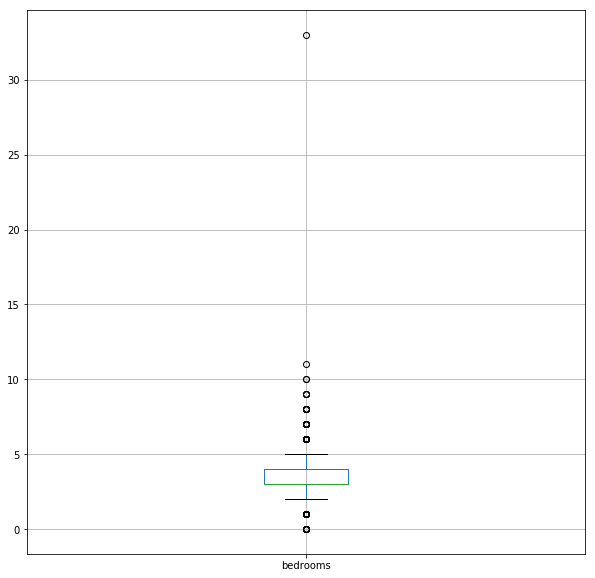

In [15]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('bedrooms', figsize= (10,10))

In [16]:
# let us check why one house has 33 bedrooms. Check if it is a mistake. 
# the sqft_living and number of bedroom suggests us that it is a mistake.
new_df[new_df.bedrooms==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [17]:
# check the median sqft_living and compare with house with 33 bedrooms
new_df[new_df.bedrooms==3].sqft_living.median()

1660.0

In [18]:
# check the median sqft_lot and compare with house with 33 bedrooms
new_df[new_df.bedrooms==3].sqft_lot.median()

7600.0

In [19]:
# Change the bad data 33 to 3 in bedrooms columns
new_df.loc[new_df.bedrooms==33, 'bedrooms'] = 3

In [20]:
# check if bedrooms == 33 exist
new_df[new_df.bedrooms==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


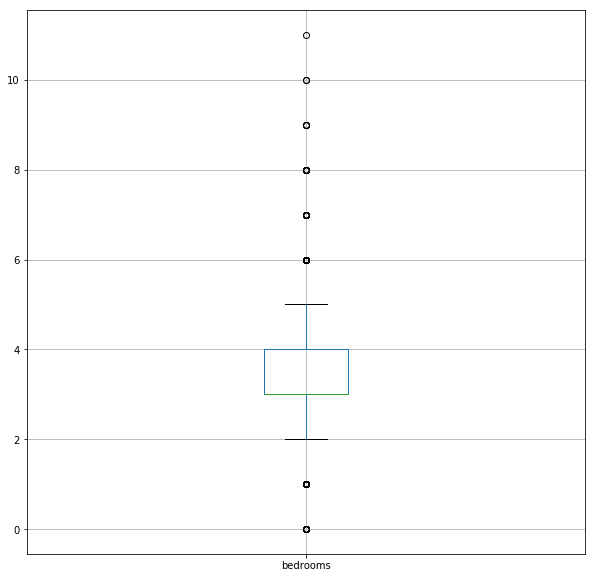

In [21]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('bedrooms', figsize= (10,10))

In [22]:
# check if number of max bedroom is mistake or bad data
new_df[new_df.bedrooms == max(new_df.bedrooms)][['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade']]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade
8757,520000.0,11,3.0,3000,4960,2.0,7


In [23]:
new_df[new_df.bedrooms==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675
14423,9543000205,20150413T000000,139950.0,0,0.00,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600


In [24]:
# how many houses with more than 6 bedrooms
new_df[new_df.bedrooms>6].id.count()

46

In [25]:
# how many houses with less than 1 bedrooms
new_df[new_df.bedrooms<1].id.count()

12

In [26]:
# get the index of houses with more than 6 bedrooms and less than 1 bedrooms and drop them
index = new_df[(new_df.bedrooms>6)|(new_df.bedrooms<1)].index
new_df = new_df.drop(index)

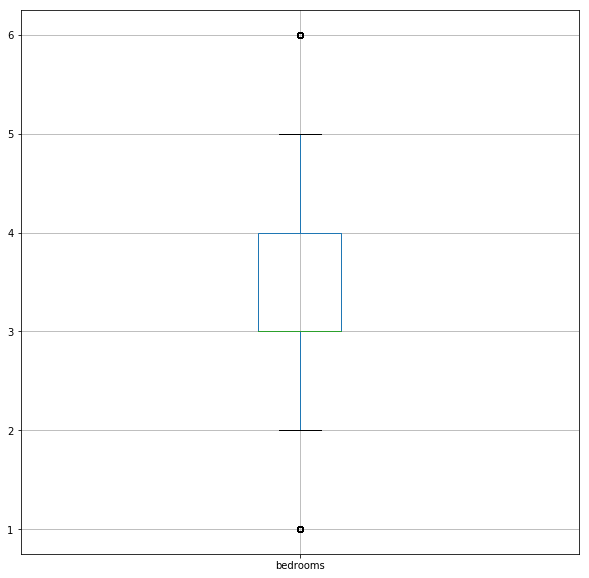

In [27]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('bedrooms', figsize= (10,10))

In [28]:
# to see how many observations were dropped 
count_observations-len(new_df)

58

In [29]:
count_observations = len(new_df)

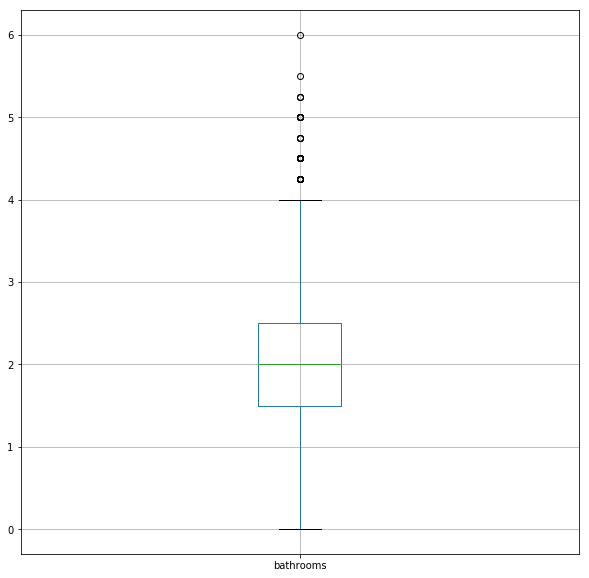

In [30]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('bathrooms', figsize= (10,10))

In [31]:
new_df = remove_outliers('bathrooms',new_df)

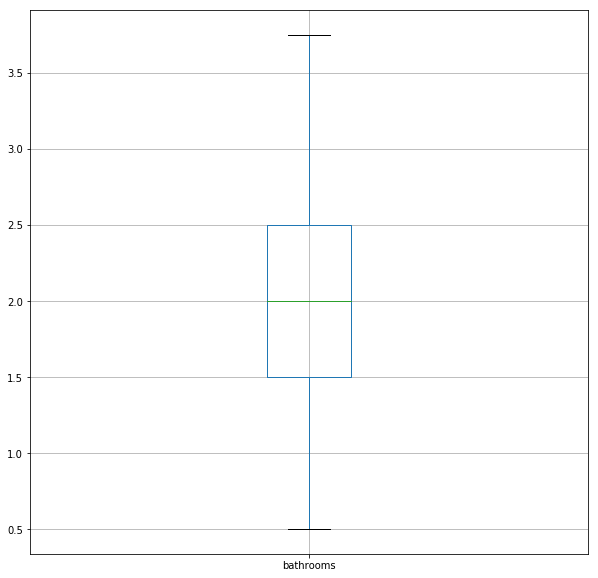

In [32]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('bathrooms', figsize= (10,10))

In [33]:
# to see how many observations were dropped 
count_observations-len(new_df)

165

In [34]:
count_observations= len(new_df)

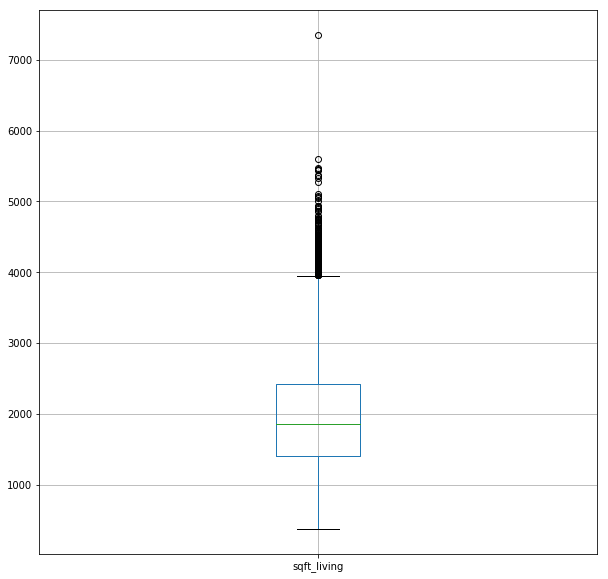

In [35]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('sqft_living', figsize= (10,10))

In [36]:
# find top 10 house with large sqft_living and see what are their features
# Make sure they are not mistake or bad input data
new_df[['id','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_basement','sqft_living15', 'sqft_lot15']].sort_values('sqft_living',ascending=False).head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,sqft_living15,sqft_lot15
2713,7851980260,1110000.0,5,3.50,7350,12231,2.0,11,2600,5380,12587
15560,1326059182,1089000.0,5,3.25,5600,107157,2.0,10,2160,3470,75794
18366,2225059273,975000.0,5,3.50,5470,35071,2.0,11,880,3600,35074
10980,5729000070,545000.0,4,2.00,5461,22880,1.0,9,2196,1940,10995
1622,9485950310,610000.0,4,3.25,5450,37058,1.5,9,0,2800,35716
6628,3322049005,850000.0,4,2.75,5440,239580,1.0,9,2720,1970,40392
20892,7299810040,790000.0,4,3.00,5370,69848,2.0,10,1870,4443,94403
3954,7964410100,700000.0,4,3.50,5360,25800,1.0,9,2090,2650,21781
19825,8562710550,950000.0,5,3.75,5330,6000,2.0,10,1760,4420,5797
8362,7937600395,782000.0,4,3.50,5270,53428,2.0,10,1830,2340,30904


Houses with large sqft_living have more than 4 bedrooms and have grade more than 9. But comparing to sqft_living 15, the value is not close to each other. This indicate that these values for sqft_living are for big mansions and not regular family size houses. 

In [37]:
# Remove outliers from sqft_living
new_df = remove_outliers('sqft_living',new_df)

In [38]:
# find top 10 house with large sqft_living and see what are their features
# Make sure they are not mistake or bad input data
new_df[['id','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_basement','sqft_living15', 'sqft_lot15']].sort_values('sqft_living',ascending=False).head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,sqft_living15,sqft_lot15
3284,4309710100,725000.0,4,3.25,3940,27591,2.0,9,500,3420,29170
20981,3746700120,857326.0,3,3.50,3940,11632,2.0,10,0,2015,11632
12593,7853301520,695000.0,5,3.25,3940,9780,2.0,9,0,3550,8468
1363,5556300102,933399.0,3,2.50,3940,10360,2.0,9,830,2720,11941
19781,2867300160,450000.0,5,3.50,3931,9497,2.0,10,1281,3510,9497
9927,8568030030,575000.0,4,3.50,3930,16970,2.0,9,0,2740,17219
9664,2944010210,1093000.0,4,2.50,3930,21894,2.0,11,0,3930,20000
3754,686400930,589000.0,5,2.00,3930,10150,1.5,8,860,2200,8190
20676,629890070,828950.0,4,3.50,3930,5680,2.0,9,1110,3700,5816
16229,7853301660,710000.0,5,3.25,3920,8572,2.0,9,0,3335,7258


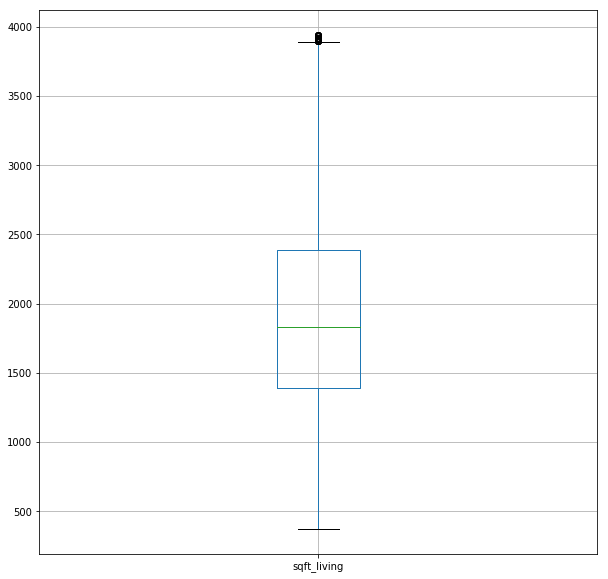

In [39]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('sqft_living', figsize= (10,10))

In [40]:
# to see how many observations were dropped 
count_observations-len(new_df)

260

In [41]:
count_observations = len(new_df)

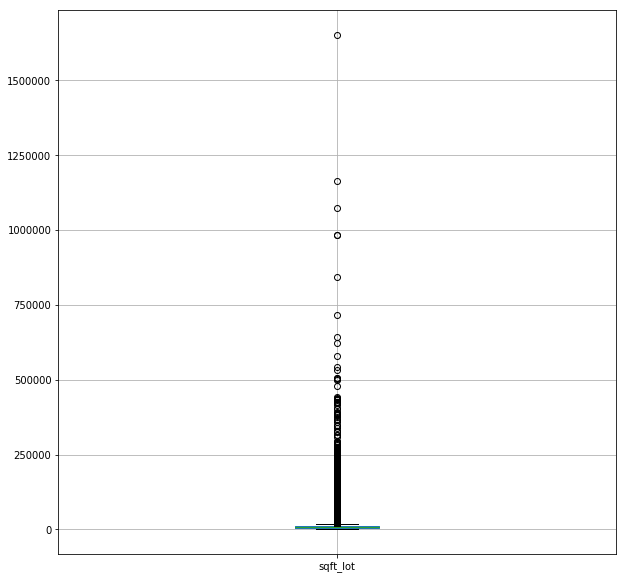

In [42]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('sqft_lot', figsize= (10,10))

In [43]:
# find top 10 house with large sqft_lot and see what are their features
# Make sure they are not mistake or bad input data
new_df[['id','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_basement','sqft_living15', 'sqft_lot15']].sort_values('sqft_lot',ascending=False).head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,sqft_living15,sqft_lot15
1719,1020069017,700000.0,4,1.00,1300,1651359,1.0,6,0,2560,425581
17319,3326079016,190000.0,2,1.00,710,1164794,1.0,5,0,1680,16730
7647,2623069031,542500.0,5,3.25,3010,1074218,1.5,8,1000,2450,68825
3949,722069232,998000.0,4,3.25,3770,982998,2.0,10,0,2290,37141
4441,3626079040,790000.0,2,3.00,2560,982278,1.0,8,0,1620,40946
4540,2522029039,550000.0,3,2.00,3650,843309,2.0,7,0,1870,273992
13006,619079096,750000.0,3,2.50,2350,715690,1.5,9,0,1280,325393
13477,822039004,849900.0,2,2.00,2280,641203,2.0,9,0,2030,224334
16188,522079022,700000.0,3,2.50,2530,623779,1.0,8,0,2120,100623
7294,1923039022,700000.0,2,1.75,1679,577605,2.0,9,0,1850,358934


When we compare sqft_living and sqft_lot, there is a very big difference in size. When we compare sqft_lot15 and sqft_lot, there is also a huge difference. These input may be mistake data. According to the boxplot, we saw many outliers present in the data. 

In [44]:
# Remove outliers from sqft_lot
new_df = remove_outliers('sqft_lot',new_df)

In [45]:
# find top 10 house with large sqft_lot and see what are their features
# Make sure they are not mistake or bad input data
new_df[['id','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_basement','sqft_living15', 'sqft_lot15']].sort_values('sqft_lot',ascending=False).head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,sqft_living15,sqft_lot15
8860,325059086,811000.0,2,2.50,2510,17986,2.0,9,0,2440,8039
11300,2223059053,230000.0,2,1.00,800,17965,1.0,5,0,1500,8925
733,4021100045,550000.0,3,2.00,2380,17950,2.0,8,270,2030,23900
213,4014400292,465000.0,3,2.50,2714,17936,2.0,9,0,2590,18386
10630,5589900400,338000.0,4,1.50,1790,17925,1.0,6,0,1660,15165
11489,3345100251,429900.0,4,1.50,1820,17918,1.0,8,630,1890,15241
2034,7695500200,505000.0,3,2.50,2100,17882,2.0,8,0,2080,16686
1306,853400240,847000.0,6,2.50,3010,17864,2.0,8,0,2560,11532
8586,4055701110,795000.0,3,2.00,2420,17859,1.0,9,920,2955,17859
7392,424069130,584999.0,4,2.75,2050,17859,1.0,7,750,2960,20908


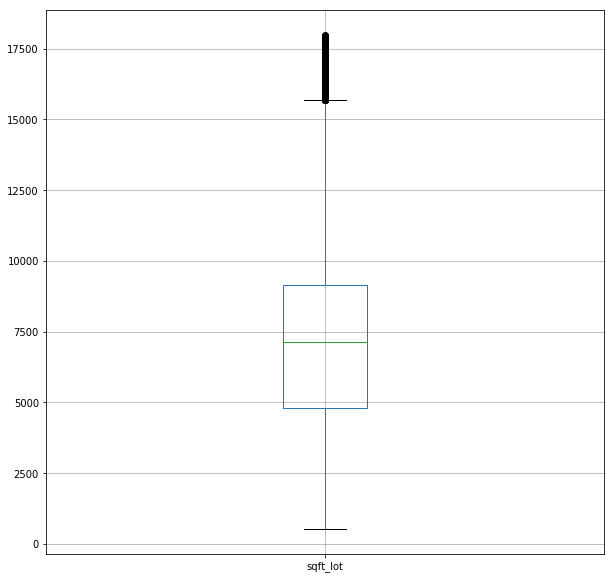

In [46]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('sqft_lot', figsize= (10,10))

In [47]:
# to see how many observations were dropped 
count_observations-len(new_df)

2099

In [48]:
count_observations = len(new_df)

In [49]:
new_df.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

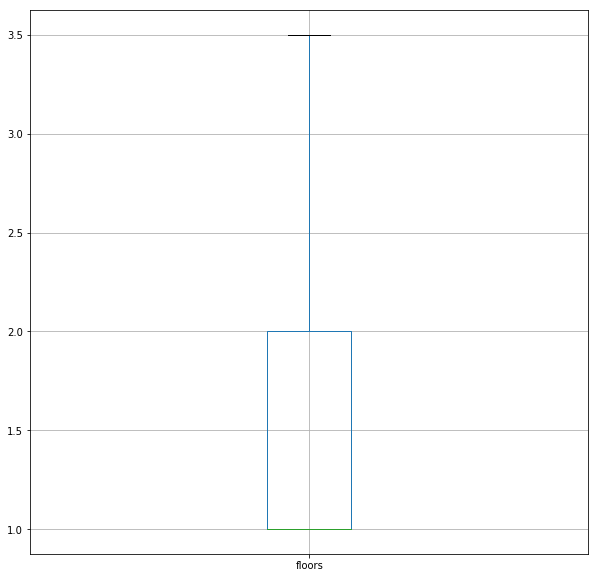

In [50]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('floors', figsize= (10,10))

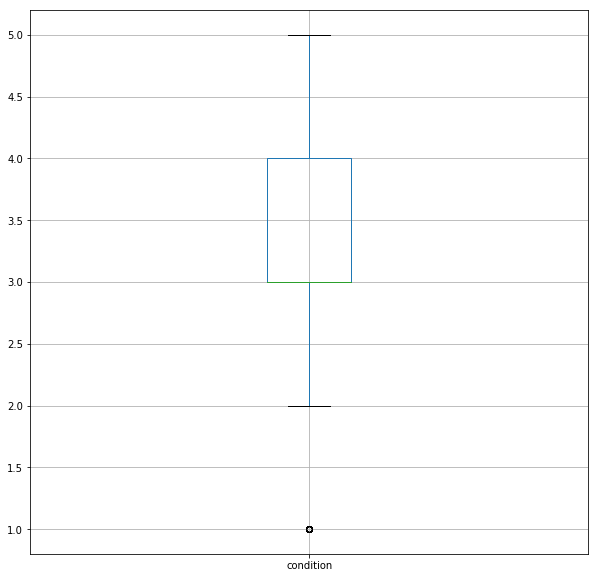

In [51]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('condition', figsize= (10,10))

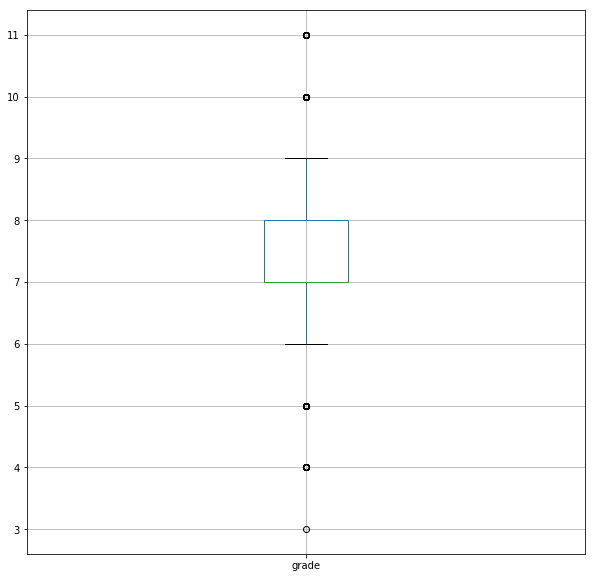

In [52]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('grade', figsize= (10,10))

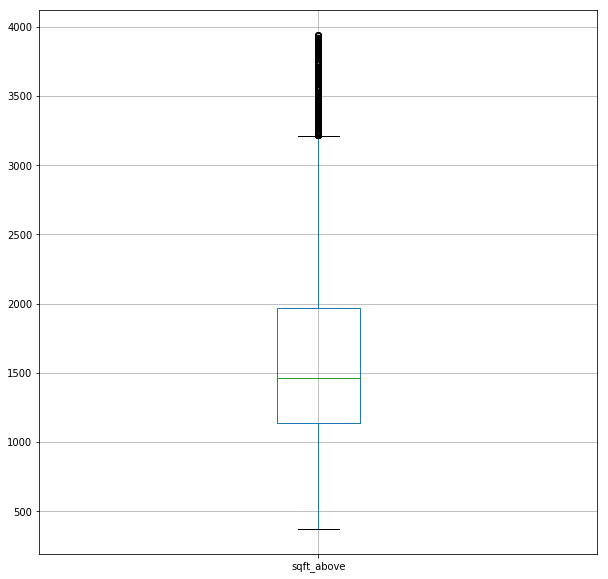

In [53]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('sqft_above', figsize= (10,10))

In [54]:
# find top 10 house with large sqft_above and see what are their features
# Make sure they are not mistake or bad input data
new_df[['id','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']].sort_values('sqft_above',ascending=False).head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
20981,3746700120,857326.0,3,3.50,3940,11632,2.0,10,3940,0,2015,11632
12593,7853301520,695000.0,5,3.25,3940,9780,2.0,9,3940,0,3550,8468
9927,8568030030,575000.0,4,3.50,3930,16970,2.0,9,3930,0,2740,17219
16229,7853301660,710000.0,5,3.25,3920,8572,2.0,9,3920,0,3335,7258
17681,7851990230,825000.0,4,3.50,3920,11086,2.0,10,3920,0,3740,10880
10975,3295610200,770000.0,4,2.50,3920,12415,2.0,10,3920,0,3639,12805
17118,7202360670,889000.0,4,3.50,3920,9555,2.0,9,3920,0,3920,8598
2811,7203220370,963990.0,4,3.50,3915,6364,2.0,9,3915,0,3830,6507
5096,7804700020,961500.0,3,2.50,3910,14000,2.0,10,3910,0,2280,14000
21049,8956200770,549950.0,4,3.50,3906,9674,2.0,9,3906,0,2673,6500


Sqft_above is the sqft area of the house minus sqft_basement. The houses with no basement will have higher sqft_above. 

In [55]:
# Remove outliers from sqft_above
new_df = remove_outliers('sqft_above',new_df)

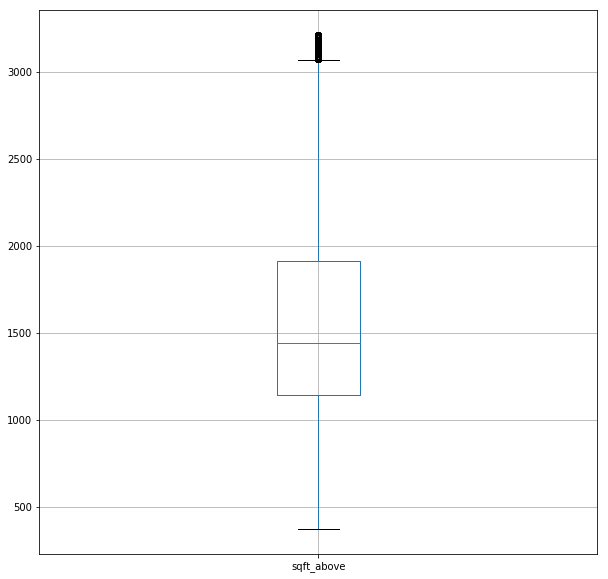

In [56]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('sqft_above', figsize= (10,10))

In [57]:
# to see how many observations were dropped 
count_observations-len(new_df)

462

In [58]:
count_observations = len(new_df)

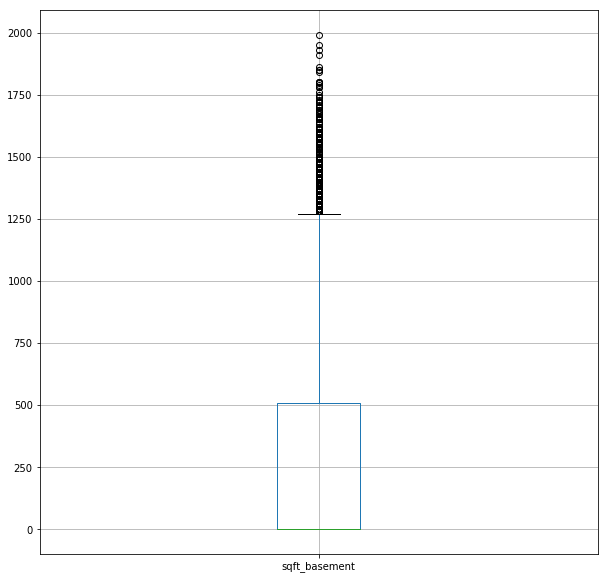

In [59]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('sqft_basement', figsize= (10,10))

In [60]:
# find top 10 house with large sqft_basement and see what are their features
# Make sure they are not mistake or bad input data
new_df[['id','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']].sort_values('sqft_basement',ascending=False).head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
13741,6837700175,775000.0,3,1.75,3520,12350,1.0,8,1530,1990,2140,7800
218,1250202145,1072000.0,2,2.25,3900,14864,1.0,8,1950,1950,2580,5184
11087,3701000060,880000.0,3,1.75,3860,9000,1.0,9,1930,1930,2960,9000
3854,1877500090,756000.0,3,2.50,3560,8297,1.0,8,1650,1910,2760,8297
13861,9201000610,875000.0,4,2.25,3720,12384,1.0,8,1860,1860,3180,15541
2749,2795000060,722500.0,5,2.25,3700,7207,1.0,8,1850,1850,2340,7900
2799,393000045,415000.0,5,1.75,3700,9140,1.0,8,1850,1850,2190,6720
18626,2485000076,1050000.0,4,3.25,3680,8580,1.0,10,1840,1840,2700,9100
5206,2785000480,768500.0,4,1.75,3620,10400,1.0,8,1820,1800,2410,10400
1838,7855000550,1100000.0,4,2.50,3830,13800,1.0,9,2030,1800,3460,9875


In [61]:
# Remove outliers from sqft_basement
new_df = remove_outliers('sqft_basement',new_df)

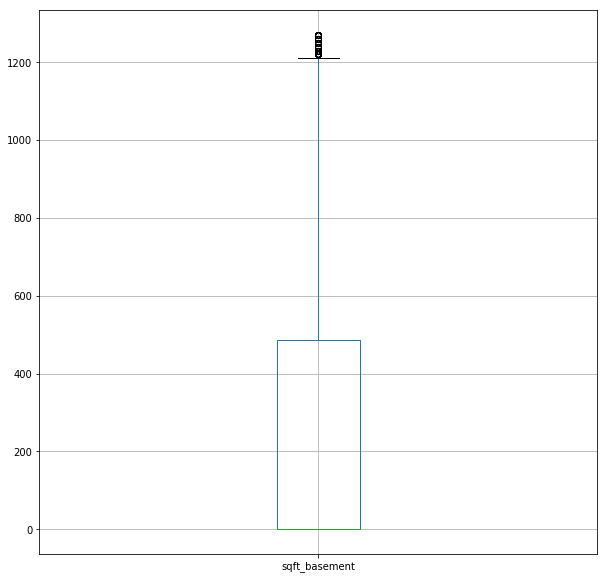

In [62]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('sqft_basement', figsize= (10,10))

In [63]:
# to see how many observations were dropped 
count_observations-len(new_df)

328

In [64]:
count_observations = len(new_df)

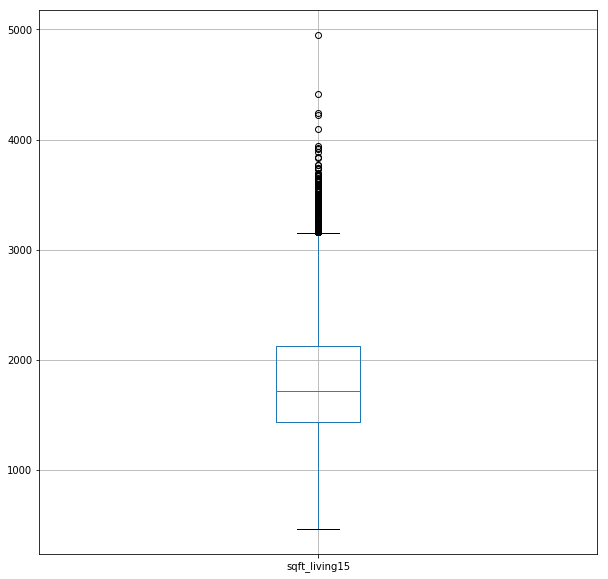

In [65]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('sqft_living15', figsize= (10,10))

In [66]:
# find top 10 house with large sqft_living15 and see what are their features
# Make sure they are not mistake or bad input data
new_df[['id','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']].sort_values('sqft_living15',ascending=False).head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
12517,5700004525,970000.0,3,2.25,3060,9950,1.5,9,1810,1250,4950,10655
20418,7853280610,709950.0,4,3.25,3910,6293,2.0,9,3130,780,4410,6015
4136,7852070090,700000.0,3,2.50,3110,11727,2.0,9,3110,0,4240,13353
19130,3758900037,865000.0,4,2.50,2580,10631,2.0,9,2580,0,4220,10631
7394,3625700080,987500.0,4,2.25,3270,15760,1.0,10,2000,1270,4100,15760
13563,5411600180,715000.0,4,2.50,2970,5722,2.0,9,2970,0,3940,4848
16626,1338800430,950000.0,3,1.75,2150,3503,2.0,8,1870,280,3920,6402
1876,8163300320,850000.0,5,2.75,2920,11880,1.0,8,1660,1260,3910,14491
10720,4139430810,912000.0,3,2.50,2979,17313,2.0,11,2979,0,3890,14797
18138,8691330910,744000.0,4,2.75,2830,13059,2.0,10,2830,0,3840,11596


In [67]:
# Remove outliers from sqft_living15
new_df = remove_outliers('sqft_living15',new_df)

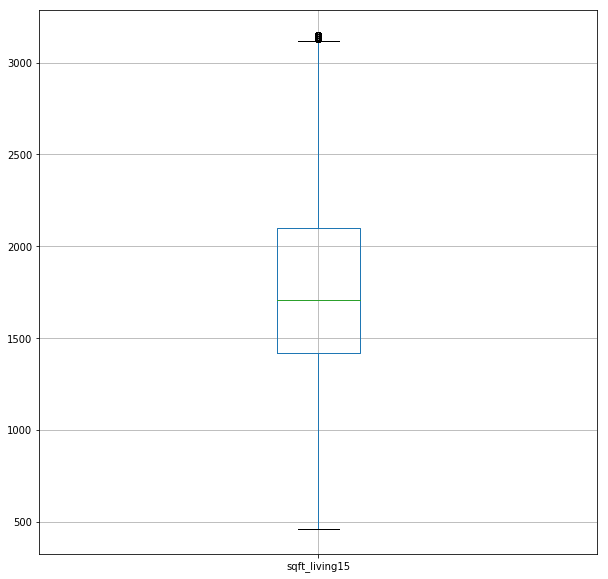

In [68]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('sqft_living15', figsize= (10,10))

In [69]:
# to see how many observations were dropped 
count_observations-len(new_df)

212

In [70]:
count_observations = len(new_df)

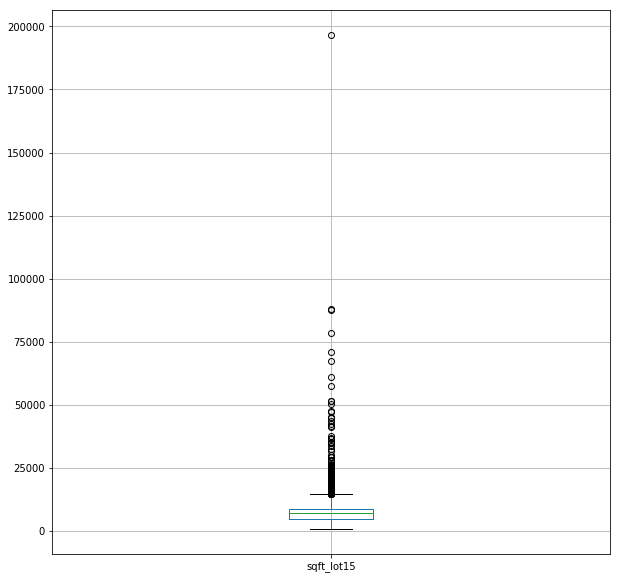

In [71]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('sqft_lot15', figsize= (10,10))

In [72]:
# find top 10 house with large sqft_lot15 and see what are their features
# Make sure they are not mistake or bad input data
new_df[['id','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']].sort_values('sqft_lot15',ascending=False).head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
4611,3523029059,181000.0,2,1.50,1560,10807,1.0,7,1560,0,1660,196591
7093,8656800020,309000.0,3,2.50,1450,11480,2.0,7,1450,0,2080,87991
13166,1523069197,379880.0,3,2.50,1650,14054,1.0,7,1130,520,1940,87555
339,4268200055,245000.0,3,1.75,1740,11547,1.0,7,1740,0,880,78408
14595,6093000065,485000.0,3,1.75,2200,7706,2.0,7,2200,0,1170,70973
2431,1726069051,306000.0,2,1.00,780,13500,1.0,7,780,0,2200,67518
1187,6398000171,545000.0,2,2.00,2930,14057,1.0,8,1680,1250,2234,61011
10575,1223089050,280000.0,3,1.75,1630,11800,1.0,7,1630,0,2090,57428
11956,920069053,201000.0,3,1.00,960,15273,1.0,7,960,0,1930,51400
14527,3888100133,360000.0,3,1.00,1160,10988,1.0,7,1160,0,1670,51376


In [73]:
# Remove outliers from sqft_lot15
new_df = remove_outliers('sqft_lot15',new_df)

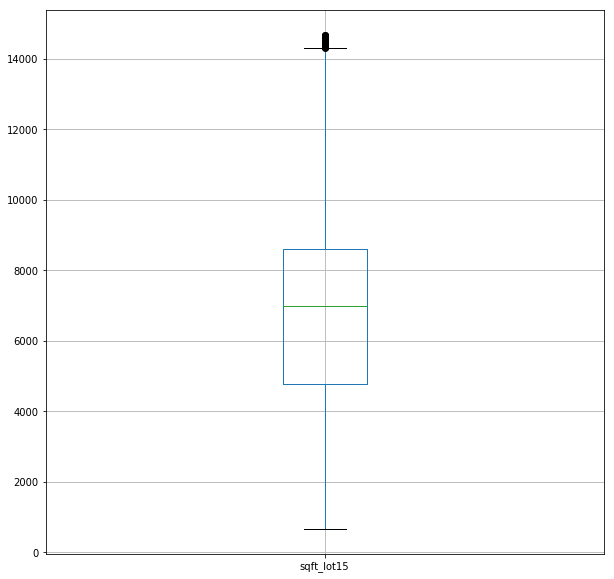

In [74]:
# Using the boxplot we can see if there are any outliers.
new_df.boxplot('sqft_lot15', figsize= (10,10))

In [75]:
# to see how many observations were dropped 
count_observations-len(new_df)

387

In [76]:
count_observations = len(new_df)

In [77]:
# Count of observation in our dataset
len(new_df)

16496

In [78]:
# Total number of observations dropped from the original dataset
len(df) - len(new_df)

5117

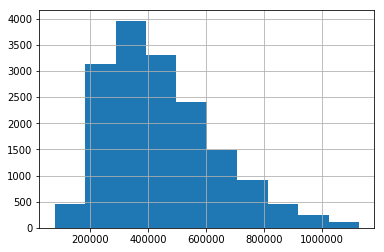

In [79]:
# plot a histogram of price
new_df.price.hist()

In [80]:
# Create an empty dictionary to hold corrcoef data which will be used later for feature selection
corrcoef_dict = {}
# Define a function to plot a scatter plot with regression line
def reg_plot(x_input,y_input,data):
    _ = plt.subplots(figsize=(10,5))
    # Plot the illiteracy rate versus fertility
    _ = plt.plot(data[x_input], data[y_input], marker='.', linestyle='none')
    plt.margins(0.02)
    _ = plt.xlabel(x_input)
    _ = plt.ylabel(y_input)
    # Perform a linear regression using np.polyfit(): a, b
    a, b = np.polyfit(data[x_input], data[y_input],1)
    # calculate the correaltion 
    corrcoef = np.corrcoef(data[x_input],data[y_input])[1][0]
    corrcoef_dict[x_input] = corrcoef    
    print('corrcoef =', corrcoef)
    # Print the results to the screen
    print('slope =', a)
    print('intercept =', b)
    # Make theoretical line to plot
    x = np.array([0,max(data[x_input])]) #array consists of 0 and maximum x-axis point
    y = a * x + b
    # Add regression line to your plot
    _ = plt.plot(x, y)
    # Draw the plot and save the figure
    plt.title('Scatter plot of '+x_input+' and '+y_input)
    output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization',x_input+'_'+y_input+'_'+'scatterplot.jpg')
    plt.savefig(output_path)
    plt.show()

corrcoef = 0.23508272403242075
slope = 53593.93123076522
intercept = 272800.67734085006


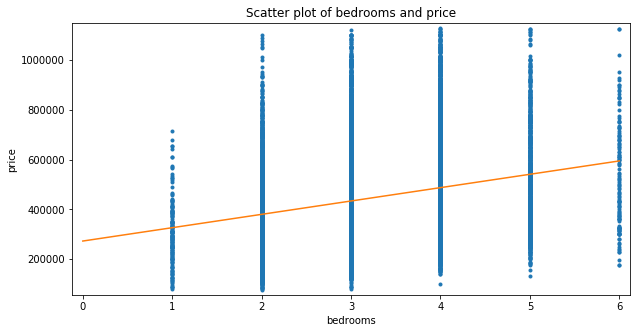

In [81]:
# scatter plot for bedroom vs price
reg_plot('bedrooms', 'price', data=new_df)

corrcoef = 0.360725441605421
slope = 103494.5121858706
intercept = 243221.4458845577


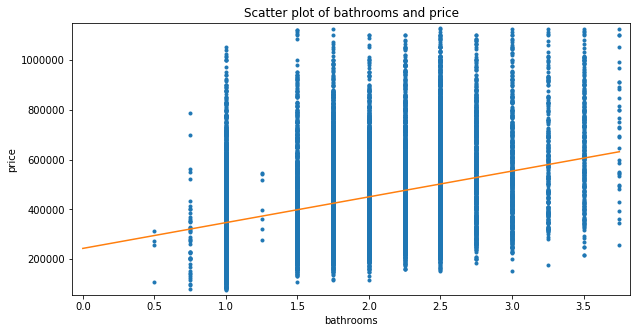

In [82]:
# scatter plot for bathroom vs price
reg_plot('bathrooms', 'price', data=new_df)

corrcoef = 0.5240517556942084
slope = 164.59105934894714
intercept = 151073.26919269768


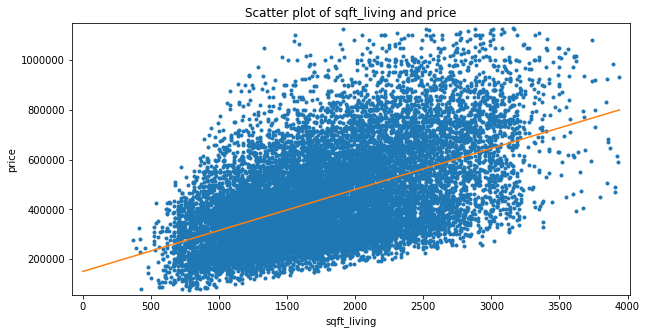

In [83]:
# scatter plot for sqft_living vs price
reg_plot('sqft_living', 'price', data=new_df)

corrcoef = -0.08906906542873415
slope = -5.250882848571994
intercept = 482371.5223250278


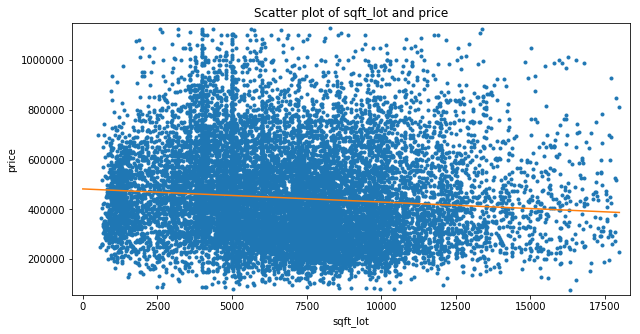

In [84]:
# scatter plot for sqft_lot vs price
reg_plot('sqft_lot', 'price', data=new_df)

corrcoef = 0.23849258294694023
slope = 82707.97343757385
intercept = 325377.8818876888


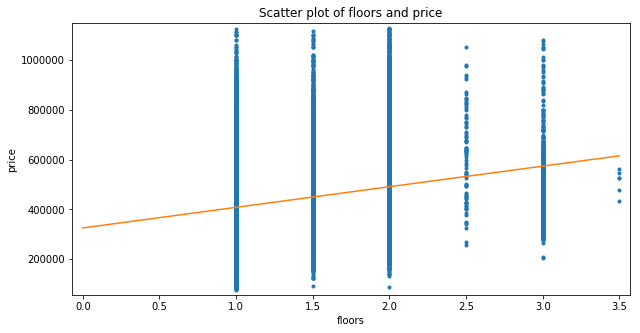

In [85]:
# scatter plot for floors vs price
reg_plot('floors', 'price', data=new_df)

corrcoef = 0.055701750289665536
slope = 295455.6322364296
intercept = 445922.5582397598


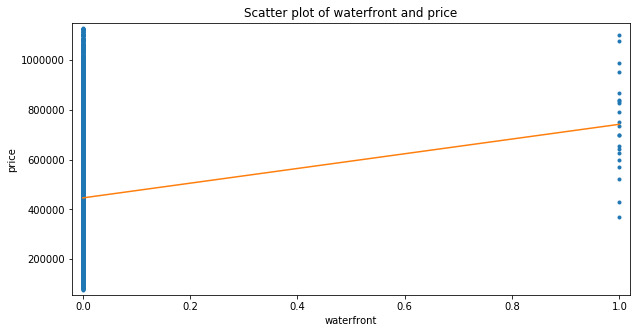

In [86]:
# scatter plot for waterfront vs price
reg_plot('waterfront', 'price', data=new_df)

corrcoef = 0.21887392569238953
slope = 77020.9291903969
intercept = 436577.6863740077


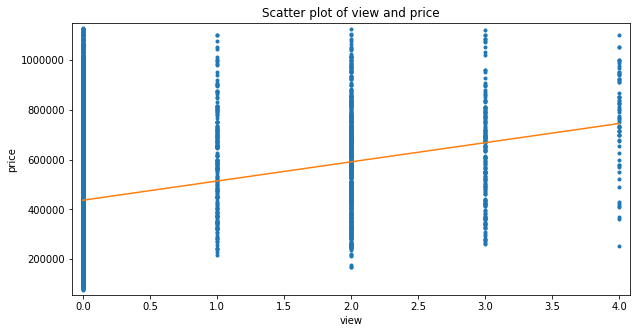

In [87]:
# scatter plot for view vs price
reg_plot('view', 'price', data=new_df)

corrcoef = 0.07884038002326392
slope = 22855.323746181413
intercept = 368273.8562217367


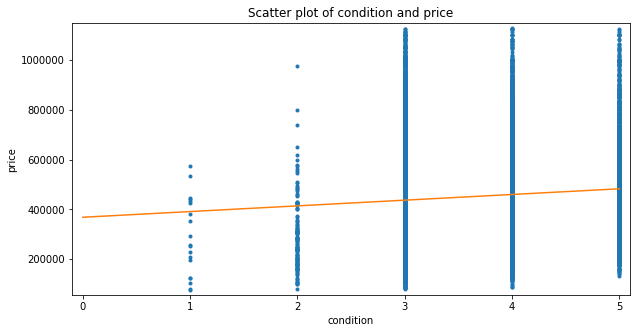

In [88]:
# scatter plot for condition vs price
reg_plot('condition', 'price', data=new_df)

corrcoef = 0.5462097894075986
slope = 116852.74605246111
intercept = -414052.32679447473


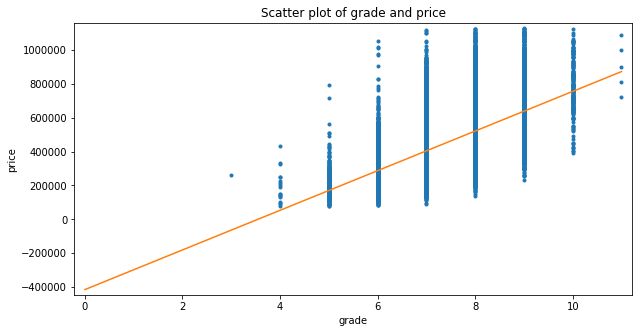

In [89]:
# scatter plot for grade vs price
reg_plot('grade', 'price', data=new_df)

corrcoef = 0.40341807735170127
slope = 133.23711924244947
intercept = 239055.90489225512


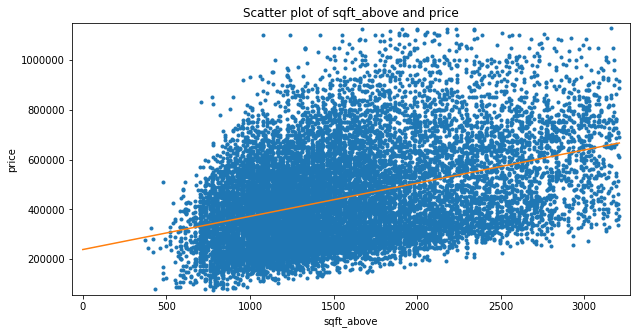

In [90]:
# scatter plot for sqft_above vs price
reg_plot('sqft_above', 'price', data=new_df)

corrcoef = 0.23922729972990953
slope = 128.00670808075043
intercept = 415801.44261623744


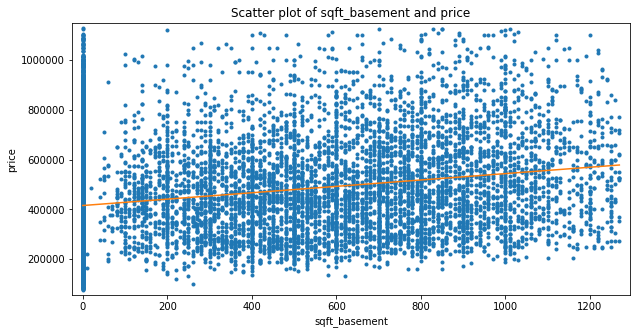

In [91]:
# scatter plot for sqft_basement vs price
reg_plot('sqft_basement', 'price', data=new_df)

corrcoef = 0.43954827471901764
slope = 170.63878397625473
intercept = 142412.43254731136


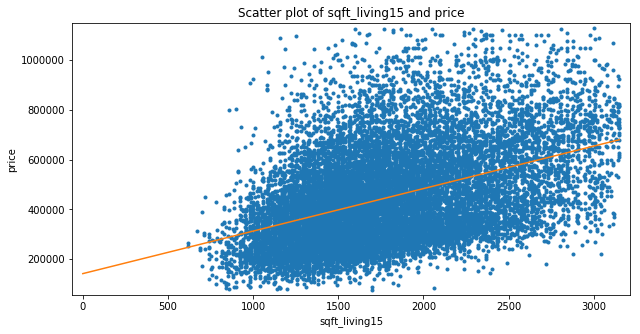

In [92]:
# scatter plot for sqft_living_15 vs price
reg_plot('sqft_living15', 'price', data=new_df)

corrcoef = -0.10753475852191301
slope = -7.195536406315126
intercept = 494910.7799636951


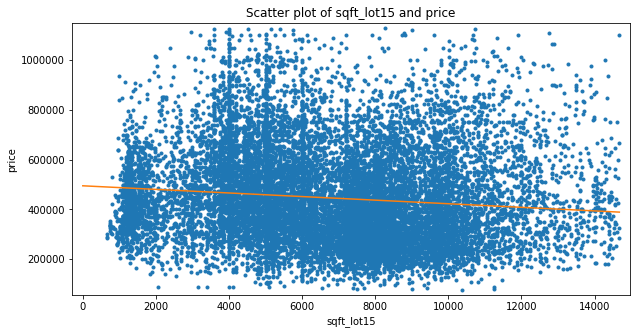

In [93]:
# scatter plot for sqft_lot15 vs price
reg_plot('sqft_lot15', 'price', data=new_df)

In [94]:
def bar_chart(column, data):
    #Group the data by number of bedrooms and their average price
    group_col = new_df.groupby(column).mean()
    # plot a bar plot of number of bedrooms and average price
    group_col.price.plot.bar(figsize=(10,10))
    title = 'Average price vs ' + column
    plt.ylabel('Average price')
    plt.title(title)
    output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization',column+'_'+'average_price_barplot.jpg')
    plt.savefig(output_path)
    plt.show()

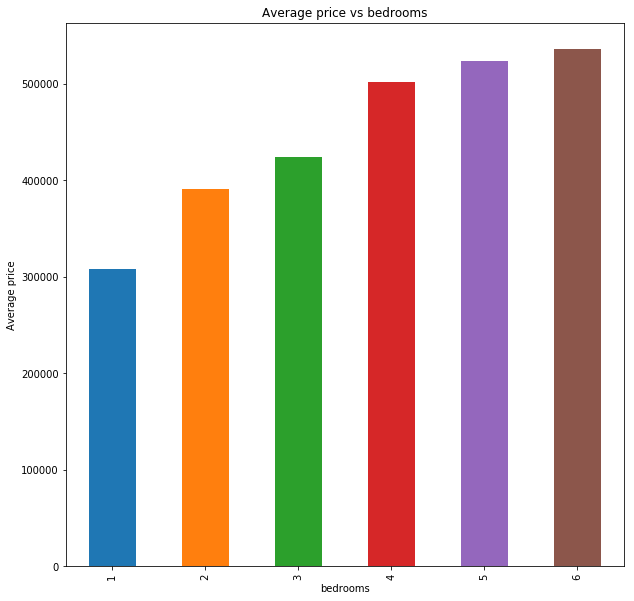

In [95]:
# plot a bar plot of bedrooms and average price
bar_chart('bedrooms', new_df)

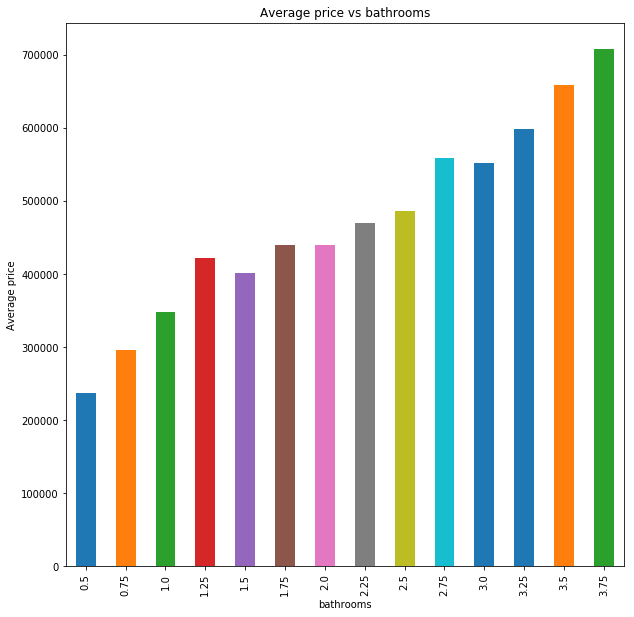

In [96]:
# plot a bar plot of bathrooms and average price
bar_chart('bathrooms',new_df)

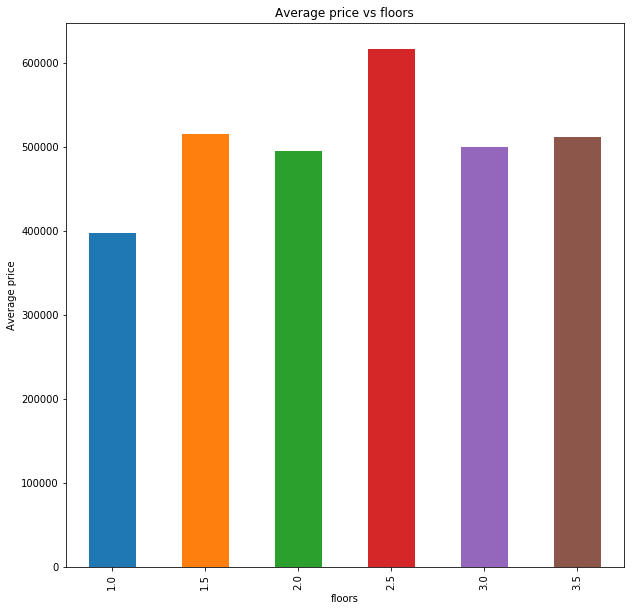

In [97]:
# plot a bar plot of floors and average price
bar_chart('floors',new_df)

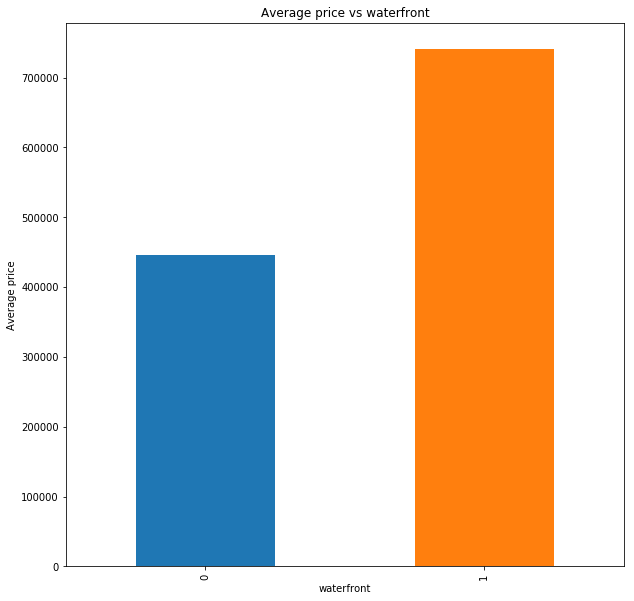

In [98]:
# plot a bar plot of waterfront and average price
bar_chart('waterfront',new_df)

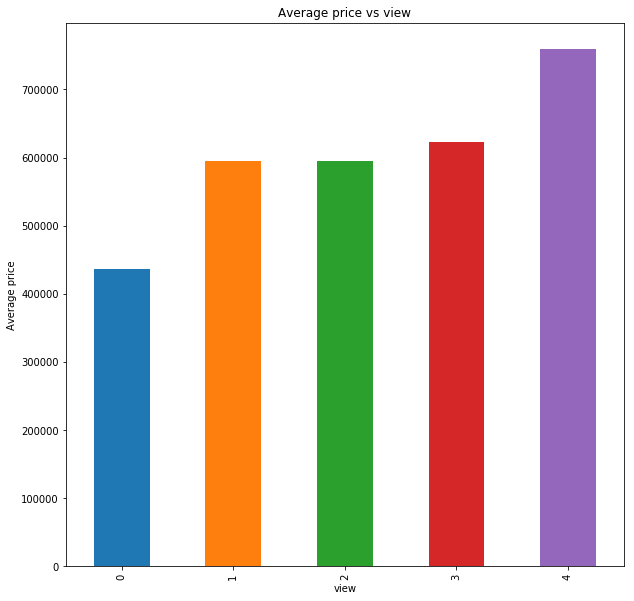

In [99]:
# plot a bar plot of view and average price
bar_chart('view', new_df)

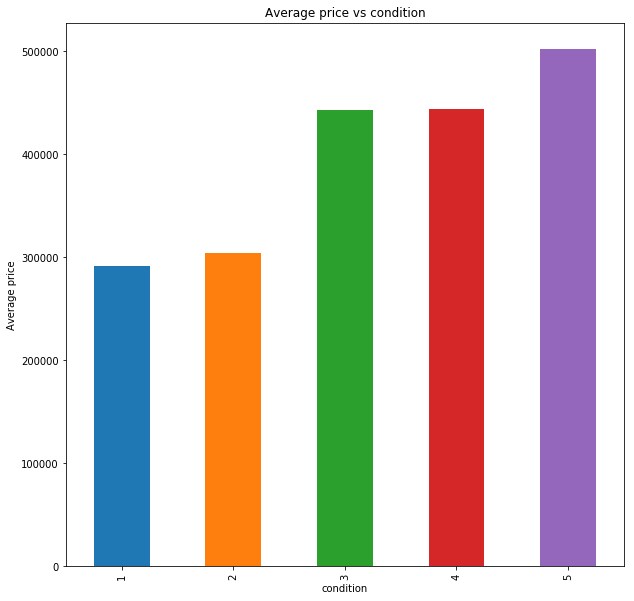

In [100]:
# plot a bar plot of condition and average price
bar_chart('condition',new_df)

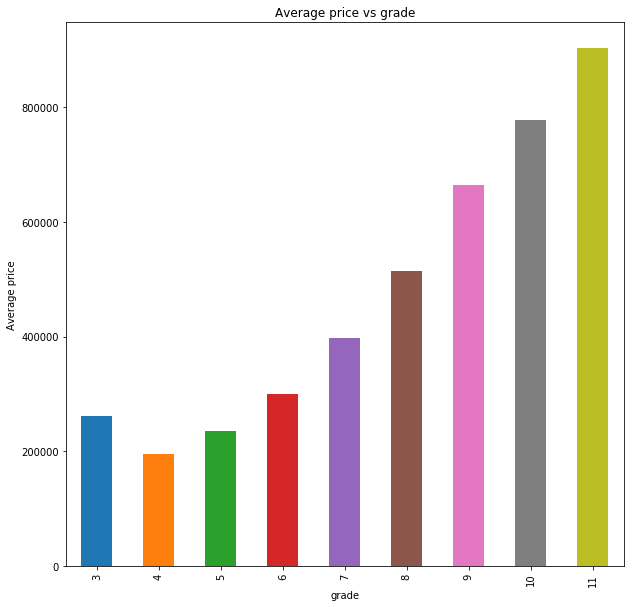

In [101]:
# plot a bar plot of grade and average price
bar_chart('grade',new_df)

In [102]:
# create a column basement using sqft_basement to store with/without basement
# if the house does not have basement the area sqft_basement is 0
new_df['basement'] = new_df['sqft_basement']
# Change the house with basement to 1
new_df.loc[new_df.basement!=0,'basement'] = 1

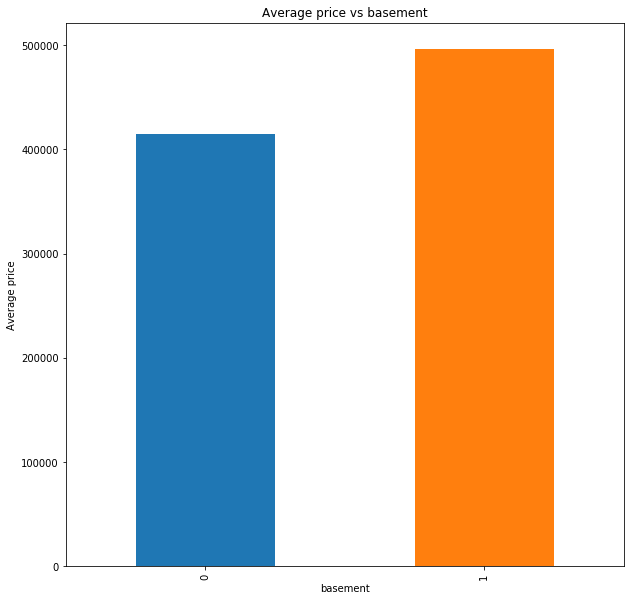

In [103]:
# plot a bar plot of basement and average price
bar_chart('basement',new_df)

In [104]:
#create a column renovated using yr_renovated
# if the house is not renovated the yr_renovated is 0, if renovated: yr_renovated
new_df['renovated'] = new_df['yr_renovated']
# Change the house with basement to 1
new_df.loc[new_df.renovated!=0,'renovated'] = 1

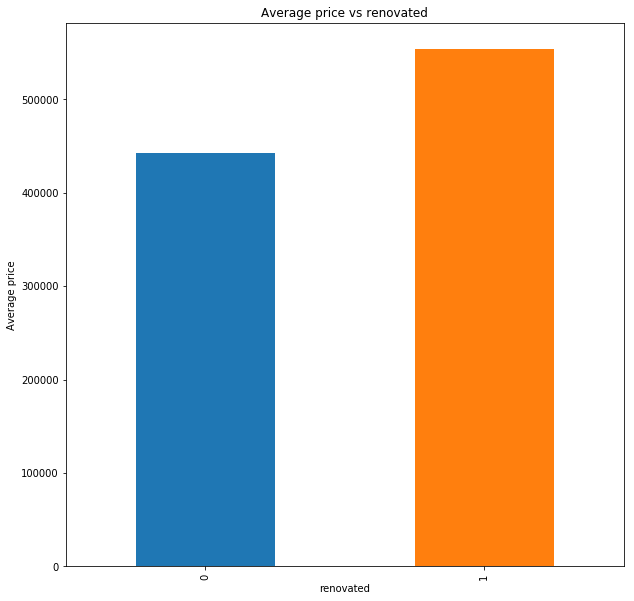

In [105]:
# plot a bar plot of renovated and average price
bar_chart('renovated',new_df)

# Inferential Statistics

In [106]:
#H0: There is no significant correlation between number of bedroom and price.
#Ha: There is a correlation between number of bedrooms and price.

In [107]:
#function to calculate the pearson's r
def pearson_r(x,y):
    ''' Compute Pearson's correlation 
    coefficient between two arrays.'''
    #Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)
    #return entry[0,1]
    return corr_mat[0,1]

In [108]:
np.random.seed(0)
# Compute observed correlation: r_obs
r_obs = pearson_r(new_df.bedrooms, new_df.price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute bedrooms measurments: bedrooms_permuted
    bedrooms_permuted = np.random.permutation(new_df.bedrooms)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(bedrooms_permuted, new_df.price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 0.0


p-value = 0. The p-value is less than level of significance 0.05, so we reject the null hypothesis. There is a correlation between number of bedrooms and price. 

In [109]:
#H0: There is no significant correlation between number of bathroom and price.
#Ha: There is a correlation.

In [110]:
np.random.seed(1)
# Compute observed correlation: r_obs
r_obs = pearson_r(new_df.bathrooms, new_df.price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute bathrooms measurments: bathrooms_permuted
    bathrooms_permuted = np.random.permutation(new_df.bathrooms)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(bathrooms_permuted, new_df.price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 0.0


p-value = 0. The p-value is less than level of significance 0.05, so we reject the null hypothesis. There is a correlation between number of bathrooms and price. 

In [111]:
#H0: There is no significant correlation between sqft_living and price.
#Ha: There is a correlation.

In [112]:
np.random.seed(0)
# Compute observed correlation: r_obs
r_obs = pearson_r(new_df.sqft_living, new_df.price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute sqft_living measurments: sqft_living_permuted
    sqft_living_permuted = np.random.permutation(new_df.sqft_living)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(sqft_living_permuted, new_df.price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 0.0


p-value = 0.0. The p-value is less than level of significance 0.05, so we reject the null hypothesis. There is a correlation between sqft_living and price. 

# Price vs grade

In [113]:
#H0: There is no significant correlation between grade and price.
#Ha: There is a correlation.
np.random.seed(0)
# Compute observed correlation: r_obs
r_obs = pearson_r(new_df.grade, new_df.price)
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)
# Draw replicates
for i in range(10000):
    # Permute grade measurments: grade_permuted
    grade_permuted = np.random.permutation(new_df.grade)
    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(grade_permuted, new_df.price)
# Compute p-value: p
p_value = np.sum(perm_replicates>=r_obs) / len(perm_replicates)
print('p-val =', p_value)

p-val = 0.0


p-value = 0.0. The p-value is less than level of significance 0.05, so we reject the null hypothesis. There is a correlation between grade and price.

In [114]:
# H0: There is no statistical importance between mean house price and number of bedroom less than 3 and greater than 3
# H1: There is statistical importance between mean house price and number of bedroom less than 3 and greater than 3

In [115]:
#create two data frames: one with Number of bedrooms less than 3 and one with Number of bedrooms greater than 3
new_df_bedrooms_l3 = new_df[new_df['bedrooms'] < 3]
new_df_bedrooms_g3 = new_df[new_df['bedrooms'] > 3]

In [116]:
# H0: mean(new_df_bedrooms_l3['price']) - mean(new_df_bedrooms_g3['price']) = 0
# Ha: mean(new_df_bedrooms_l3['price']) - mean(new_df_bedrooms_g3['price']) !=0
# Level of significance = 0.05
sample_new_df_bedrooms_l3_mean = np.mean(new_df_bedrooms_l3['price'])
sample_new_df_bedrooms_g3_mean = np.mean(new_df_bedrooms_g3['price'])
variance_new_df_bedrooms_l3 = np.var(new_df_bedrooms_l3['price'])
variance_new_df_bedrooms_g3 = np.var(new_df_bedrooms_g3['price'])
diff_mean = sample_new_df_bedrooms_l3_mean - sample_new_df_bedrooms_g3_mean
n_new_df_bedrooms_l3 = len(new_df_bedrooms_l3['price'])
n_new_df_bedrooms_g3 = len(new_df_bedrooms_g3['price'])
#Calculate the z-value
z= diff_mean / np.sqrt((variance_new_df_bedrooms_l3/n_new_df_bedrooms_l3)+(variance_new_df_bedrooms_g3/n_new_df_bedrooms_g3))
z

-0.28686053297513797

In [117]:
# The bootstrap method
np.random.seed(1)
#Bootstrap replicate function to resample data and find mean/std
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

#draw many bootstrap replicates 
def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

mean_diff = np.mean(new_df_bedrooms_l3['price']) - np.mean(new_df_bedrooms_g3['price'])
# To find the p-value
combined_mean = np.mean(new_df['price'])
#shift the samples
new_df_bedrooms_l3_shifted = new_df_bedrooms_l3['price'] - np.mean(new_df_bedrooms_l3['price']) + combined_mean
new_df_bedrooms_g3_shifted = new_df_bedrooms_g3['price'] - np.mean(new_df_bedrooms_g3['price']) + combined_mean
#get bootstrap replicates of shifted data sets
bs_replicates_new_df_bedrooms_l3 = draw_bs_reps(new_df_bedrooms_l3_shifted, np.mean, size=10000)
bs_replicates_new_df_bedrooms_g3 = draw_bs_reps(new_df_bedrooms_g3_shifted, np.mean, size=10000)
#compute replicates of difference of means:
bs_diff_replicates = bs_replicates_new_df_bedrooms_l3 - bs_replicates_new_df_bedrooms_g3
#compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)
p

0.6089

Because the p-value is greater than level of significance 0.05, we will fail to reject the null hypothesis. There is no statistical importance between mean house price and number of bedroom less than 3 and greater than 3.

In [118]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16496 entries, 0 to 21612
Data columns (total 23 columns):
id               16496 non-null int64
date             16496 non-null object
price            16496 non-null float64
bedrooms         16496 non-null int64
bathrooms        16496 non-null float64
sqft_living      16496 non-null int64
sqft_lot         16496 non-null int64
floors           16496 non-null float64
waterfront       16496 non-null int64
view             16496 non-null int64
condition        16496 non-null int64
grade            16496 non-null int64
sqft_above       16496 non-null int64
sqft_basement    16496 non-null int64
yr_built         16496 non-null int64
yr_renovated     16496 non-null int64
zipcode          16496 non-null int64
lat              16496 non-null float64
long             16496 non-null float64
sqft_living15    16496 non-null int64
sqft_lot15       16496 non-null int64
basement         16496 non-null int64
renovated        16496 non-null int64
dtypes

# Machine Learning

Linear Regression

Decision Tree Regression

Gradient Boosting Regsresion

Random Forest Regression

In [119]:
#X is the features/data we use for our model (input data)
# i did not include id because it is not a predictor of the price
# i did not include date in the features because it is a datatime object
X = new_df.drop(['price','id','date'],axis=1)
#y is the target of our data
y = new_df['price']

# Selecting Metrics

R-squared is a statistical measure of how close the data are to the fitted regression line.
R-squared score closer to 1 is better.

The MAPE (Mean Absolute Percent Error) measures the size of the error in percentage terms.
MAPE smaller the better or close to 0 is better. 

I am going to use R-squared score and MAPE to evaluate the performance of the model. 

In [120]:
#Preparing a dataframe for model analysis
#Data frame for evaluation metrics
metrics = pd.DataFrame(index=['rmse', 'r2_score', 'mae','mape'],columns=['LinearReg','DecisionTree','GradientBoost','RandomForest'])

In [121]:
# Sperate train and test data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# create traing and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# import the model
from sklearn.linear_model import LinearRegression
# 1. Set up the model
lr = LinearRegression()

# 2. Use fit
lr.fit(X_train, y_train)

lr_predict = lr.predict(X_test)
mse = mean_squared_error(y_test, lr_predict)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test, lr_predict)

# Calculate MAD and MAPE
errors = abs(lr_predict - y_test)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test)


#entering metrics score to the metics dataframe
metrics.loc['rmse','LinearReg'] = rmse
metrics.loc['r2_score','LinearReg'] = r2_score
metrics.loc['mae','LinearReg'] = mae
metrics.loc['mape','LinearReg'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.4f" % rmse)
print( 'r2_score: %.4f' % r2_score)
print('Mean Absolute Error (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

Mean Squared Error (MSE): 13276038923.51
Root Mean Squared Error (RMSE): 115221.6947
r2_score: 0.6338
Mean Absolute Error (MAE): 88288.95
Mean Absolute Percent Error (MAPE): 21.78


# Feature Selection
In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features for use in model construction.
Removing irrelevant features results in a better performing, easier to understand, and runs faster. 

In [122]:
#Preparing a dataframe for model analysis
#Data frame for evaluation metrics
LinearReg_metrics = pd.DataFrame(index=['rmse', 'r2_score', 'mae','mape'],columns=['LinearReg','LinearRegBack1','LinearRegBack2',
                                                                         'LinearRegBack3','LinearRegUnivariate'])
#entering metrics score to the LinearReg_metics dataframe
LinearReg_metrics.loc['rmse','LinearReg'] = rmse
LinearReg_metrics.loc['r2_score','LinearReg'] = r2_score
LinearReg_metrics.loc['mae','LinearReg'] = mae
LinearReg_metrics.loc['mape','LinearReg'] = mape

In [123]:
corrcoef = pd.Series(corrcoef_dict)
corrcoef.sort_values()

sqft_lot15      -0.107535
sqft_lot        -0.089069
waterfront       0.055702
condition        0.078840
view             0.218874
bedrooms         0.235083
floors           0.238493
sqft_basement    0.239227
bathrooms        0.360725
sqft_above       0.403418
sqft_living15    0.439548
sqft_living      0.524052
grade            0.546210
dtype: float64

In [124]:
# Backward Elemination 
# Remove waterfront
#X is the features/data we use for our model (input data)
X_1 = new_df.drop(['price','id','date','waterfront'],axis=1)

# create new traing and testing dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y, test_size=0.2, random_state=0)

# import the model
from sklearn.linear_model import LinearRegression
# 1. Set up the model
lr1 = LinearRegression()

# 2. Use fit
lr1.fit(X_train1, y_train1)

lr1_predict = lr1.predict(X_test1)
mse = mean_squared_error(y_test1, lr1_predict)
rmse = np.sqrt(mse)
r2_score = lr1.score(X_test1,y_test1)

# Calculate MAD and MAPE
errors = abs(lr1_predict - y_test1)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test1)

#entering metrics score to the LinearReg_metics dataframe
LinearReg_metrics.loc['rmse','LinearRegBack1'] = rmse
LinearReg_metrics.loc['r2_score','LinearRegBack1'] = r2_score
LinearReg_metrics.loc['mae','LinearRegBack1'] = mae
LinearReg_metrics.loc['mape','LinearRegBack1'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.4f" % rmse)
print( 'r2_score: %.4f' % r2_score)
print('Mean Absolute Error (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

Mean Squared Error (MSE): 13264222067.44
Root Mean Squared Error (RMSE): 115170.4045
r2_score: 0.6341
Mean Absolute Error (MAE): 88280.90
Mean Absolute Percent Error (MAPE): 21.77


In [125]:
# Backward Elemination 
# Remove condition and sqft_lot as well 
#X is the features/data we use for our model (input data)
X_2 = new_df.drop(['price','id','date','waterfront','condition','sqft_lot'],axis=1)

# create new traing and testing dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y, test_size=0.2, random_state=0)

# import the model
from sklearn.linear_model import LinearRegression
# 1. Set up the model
lr2 = LinearRegression()

# 2. Use fit
lr2.fit(X_train2, y_train2)

lr2_predict = lr2.predict(X_test2)
mse = mean_squared_error(y_test2, lr2_predict)
rmse = np.sqrt(mse)
r2_score = lr2.score(X_test2,y_test2)

# Calculate MAD and MAPE
errors = abs(lr2_predict - y_test2)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test2)

#entering metrics score to the LinearReg_metics dataframe
LinearReg_metrics.loc['rmse','LinearRegBack2'] = rmse
LinearReg_metrics.loc['r2_score','LinearRegBack2'] = r2_score
LinearReg_metrics.loc['mae','LinearRegBack2'] = mae
LinearReg_metrics.loc['mape','LinearRegBack2'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.4f" % rmse)
print( 'r2_score: %.4f' % r2_score)
print('Mean Absolute Error (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

Mean Squared Error (MSE): 13609504096.95
Root Mean Squared Error (RMSE): 116659.7793
r2_score: 0.6246
Mean Absolute Error (MAE): 89296.56
Mean Absolute Percent Error (MAPE): 22.10


In [126]:
# Backward Elemination 
# Remove sqft_lot15, view, and bedrooms as well 
# X is the features/data we use for our model (input data)
X_3 = new_df.drop(['price','id','date','waterfront','condition','sqft_lot',
                  'sqft_lot15','view','bedrooms'],axis=1)

# create new traing and testing dataset
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y, test_size=0.2, random_state=0)

# import the model
from sklearn.linear_model import LinearRegression
# 1. Set up the model
lr3 = LinearRegression()

# 2. Use fit
lr3.fit(X_train3, y_train3)

lr3_predict = lr3.predict(X_test3)
mse = mean_squared_error(y_test3, lr3_predict)
rmse = np.sqrt(mse)
r2_score = lr3.score(X_test3,y_test3)

# Calculate MAD and MAPE
errors = abs(lr3_predict - y_test3)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test3)

#entering metrics score to the LinearReg_metics dataframe
LinearReg_metrics.loc['rmse','LinearRegBack3'] = rmse
LinearReg_metrics.loc['r2_score','LinearRegBack3'] = r2_score
LinearReg_metrics.loc['mae','LinearRegBack3'] = mae
LinearReg_metrics.loc['mape','LinearRegBack3'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.4f" % rmse)
print( 'r2_score: %.4f' % r2_score)
print('Mean Absolute Error (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

Mean Squared Error (MSE): 14568147542.09
Root Mean Squared Error (RMSE): 120698.5814
r2_score: 0.5982
Mean Absolute Error (MAE): 92369.22
Mean Absolute Percent Error (MAPE): 22.87


In [127]:
# try univariate feature selection
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Feature extraction using 10 featrures down from 20 features
test = SelectKBest(score_func=f_regression)
fit = test.fit(X, y)

X_4 = fit.transform(X)

# create new traing and testing dataset
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_4, y, test_size=0.2, random_state=0)

# import the model
from sklearn.linear_model import LinearRegression
# 1. Set up the model
lr4= LinearRegression()

# 2. Use fit
lr4.fit(X_train4, y_train4)

lr4_predict = lr4.predict(X_test4)
mse = mean_squared_error(y_test4, lr4_predict)
rmse = np.sqrt(mse)
r2_score = lr4.score(X_test4,y_test4)

# Calculate MAD and MAPE
errors = abs(lr4_predict - y_test4)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test4)

#entering metrics score to the LinearReg_metics dataframe
LinearReg_metrics.loc['rmse','LinearRegUnivariate'] = rmse
LinearReg_metrics.loc['r2_score','LinearRegUnivariate'] = r2_score
LinearReg_metrics.loc['mae','LinearRegUnivariate'] = mae
LinearReg_metrics.loc['mape','LinearRegUnivariate'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.4f" % rmse)
print( 'r2_score: %.4f' % r2_score)
print('Mean Absolute Error (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

Mean Squared Error (MSE): 14857327765.93
Root Mean Squared Error (RMSE): 121890.6385
r2_score: 0.5902
Mean Absolute Error (MAE): 93000.71
Mean Absolute Percent Error (MAPE): 22.70


In [128]:
LinearReg_metrics

,LinearReg,LinearRegBack1,LinearRegBack2,LinearRegBack3,LinearRegUnivariate
rmse,115222,115170,116660,120699,121891
r2_score,0.633792,0.634118,0.624594,0.598151,0.590174
mae,88289,88280.9,89296.6,92369.2,93000.7
mape,21.7768,21.7719,22.0999,22.8664,22.7048


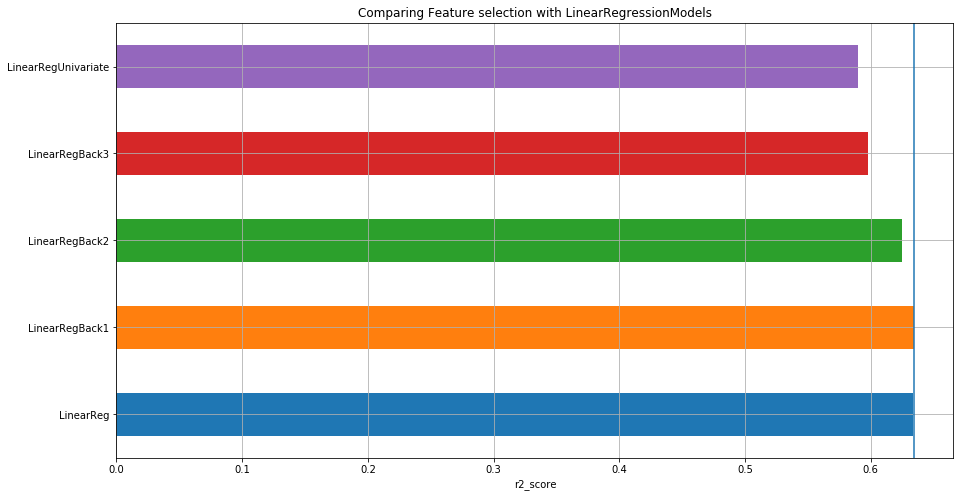

In [129]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
LinearReg_metrics.loc['r2_score'].plot(kind='barh', ax=ax)
ax.axvline(max(LinearReg_metrics.loc['r2_score']))
plt.title('Comparing Feature selection with LinearRegressionModels')
plt.xlabel('r2_score')
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization/'+'compareFeatureSelectionR2_hbarplot.jpg')
plt.savefig(output_path)
ax.grid()

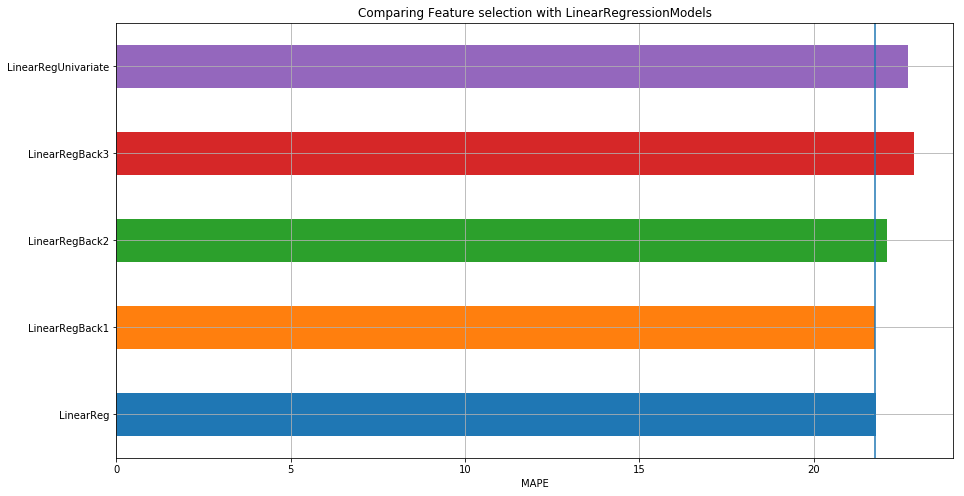

In [130]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
LinearReg_metrics.loc['mape'].plot(kind='barh', ax=ax)
ax.axvline(min(LinearReg_metrics.loc['mape']))
plt.title('Comparing Feature selection with LinearRegressionModels')
plt.xlabel('MAPE')
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization/'+'compareFeatureSelectionMAPE_hbarplot.jpg')
plt.savefig(output_path)
ax.grid()

The both bar plot suggest us that we should keep all the features to better predict the house price. 

# Comparing other Regression Models.

In [131]:
# Import
from sklearn.tree import DecisionTreeRegressor

# 1. Set up the model
dtr = DecisionTreeRegressor()
# 2. Use fit
dtr.fit(X_train, y_train)

dtr_predict = dtr.predict(X_test)
mse = mean_squared_error(y_test, dtr_predict)
rmse = np.sqrt(mse)
r2_score = dtr.score(X_test,y_test)

# Calculate MAD and MAPE
errors = abs(dtr_predict - y_test)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test)

#entering metrics score to the metics dataframe
metrics.loc['rmse','DecisionTree'] = rmse
metrics.loc['r2_score','DecisionTree'] = r2_score
metrics.loc['mae','DecisionTree'] = mae
metrics.loc['mape','DecisionTree'] = mape

print("Mean Squared Error: %.2f" % mse)
print("Root Mean Squared Error: %.2f" % rmse)
print("r-squared score : ", r2_score)
print('Mean Absolute Deviation (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

Mean Squared Error: 12025421297.16
Root Mean Squared Error: 109660.48
r-squared score :  0.6682893942359164
Mean Absolute Deviation (MAE): 76605.84
Mean Absolute Percent Error (MAPE): 18.45


In [132]:
# Import
from sklearn.ensemble import GradientBoostingRegressor

# 1. Set up the model
gbr = GradientBoostingRegressor()
# 2. Use fit
gbr.fit(X_train, y_train)
gbr_predict = gbr.predict(X_test)
mse = mean_squared_error(y_test, gbr_predict)
rmse = np.sqrt(mse)
r2_score = gbr.score(X_test,y_test)

# Calculate MAD and MAPE
errors = abs(gbr_predict - y_test)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test)

#entering metrics score to the metics dataframe
metrics.loc['rmse','GradientBoost'] = rmse
metrics.loc['r2_score','GradientBoost'] = r2_score
metrics.loc['mae','GradientBoost'] = mae
metrics.loc['mape','GradientBoost'] = mape

print("Mean Squared Error: %.2f" % mse)
print("Root Mean Squared Error: %.2f" % rmse)
print("r-squared score : ", r2_score)
print('Mean Absolute Deviation (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

Mean Squared Error: 6228482868.33
Root Mean Squared Error: 78920.74
r-squared score :  0.8281928113627098
Mean Absolute Deviation (MAE): 56373.65
Mean Absolute Percent Error (MAPE): 13.83


In [133]:
# Import
from sklearn.ensemble import RandomForestRegressor

# 1. Set up the model
rfr = RandomForestRegressor()
# 2. Use fit
rfr.fit(X_train, y_train)
rfr_predict = rfr.predict(X_test)
mse = mean_squared_error(y_test, rfr_predict)
rmse = np.sqrt(mse)
r2_score = rfr.score(X_test,y_test)

# Calculate MAE and MAPE
errors = abs(rfr_predict - y_test)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test)

#entering metrics score to the metics dataframe
metrics.loc['rmse','RandomForest'] = rmse
metrics.loc['r2_score','RandomForest'] = r2_score
metrics.loc['mae','RandomForest'] = mae
metrics.loc['mape','RandomForest'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
print("r-squared score : ", r2_score)
print('Mean Absolute Deviation (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

C:\Users\lakpa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean Squared Error (MSE): 6302252436.45
Root Mean Squared Error (RMSE): 79386.73
r-squared score :  0.8261579431012475
Mean Absolute Deviation (MAE): 54840.62
Mean Absolute Percent Error (MAPE): 13.43


In [134]:
metrics

,LinearReg,DecisionTree,GradientBoost,RandomForest
rmse,115222,109660,78920.7,79386.7
r2_score,0.633792,0.668289,0.828193,0.826158
mae,88289,76605.8,56373.7,54840.6
mape,21.7768,18.4491,13.8347,13.4251


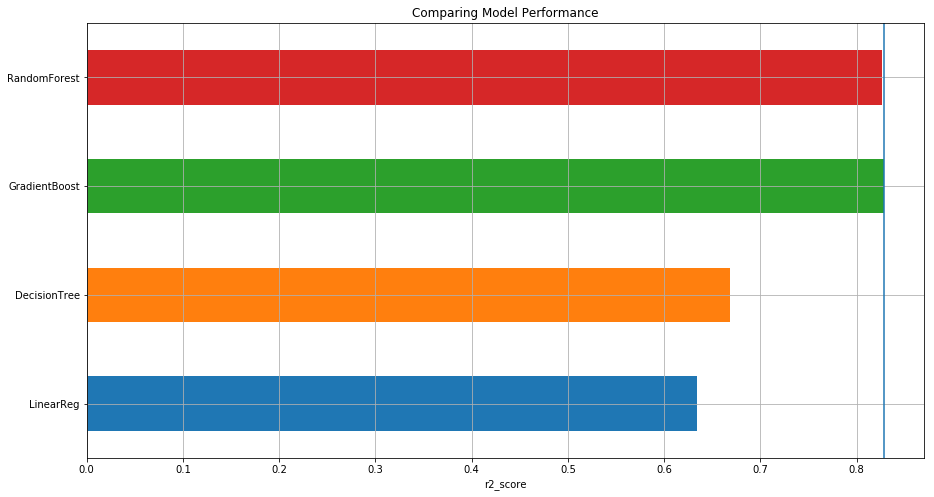

In [135]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
metrics.loc['r2_score'].plot(kind='barh', ax=ax)
ax.axvline(max(metrics.loc['r2_score']))
plt.title('Comparing Model Performance')
plt.xlabel('r2_score')
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization/'+'compareModelPerformanceR2_hbarplot.jpg')
plt.savefig(output_path)
ax.grid()

According to the r2_score, Gradient Boosted Regression model is the best performing model. Random Forest Regression model is the second better performing model for this dataset. 

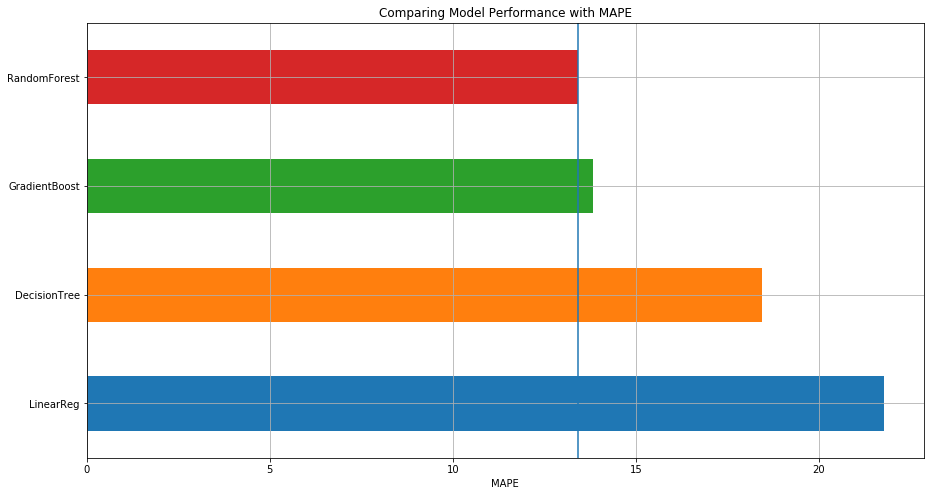

In [136]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
metrics.loc['mape'].plot(kind='barh', ax=ax)
ax.axvline(min(metrics.loc['mape']))
plt.title('Comparing Model Performance with MAPE')
plt.xlabel('MAPE')
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization/'+'compareModelPerformanceMAPE_hbarplot.jpg')
plt.savefig(output_path)
ax.grid()

According to the Mean absolute percentage error (Mape), Rondom Forest Regressor model is the better performing model. Gradient Boosting Regressor model is the second better performing model. 

# Hyperparameter Tuning 

In [137]:
#Preparing a dataframe for model analysis after parameter tuning
#Data frame for evaluation metrics for tuned models
tuned_metrics = pd.DataFrame(index=['rmse', 'r2_score', 'mae', 'mape'],columns=['LinearReg','DecisionTree','GradientBoost','RandomForest'])

In [138]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [139]:
from sklearn.model_selection import GridSearchCV

# setup the hyperparameter grid
parameters = {'copy_X':[True, False], 'fit_intercept':[True,False], 'normalize':[True,False]}
grid_search_lr = GridSearchCV(estimator = lr, param_grid = parameters, cv=5)
grid_search_lr.fit(X_train, y_train)
grid_search_lr_predict = grid_search_lr.predict(X_test)
mse = mean_squared_error(y_test, grid_search_lr_predict)
rmse = np.sqrt(mse)
r2_score = grid_search_lr.score(X_test,y_test)

# Calculate MAE and MAPE
errors = abs(grid_search_lr_predict - y_test)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test)

#entering metrics score to the tuned_metics dataframe
tuned_metrics.loc['rmse','LinearReg'] = rmse
tuned_metrics.loc['r2_score','LinearReg'] = r2_score
tuned_metrics.loc['mae','LinearReg'] = mae
tuned_metrics.loc['mape','LinearReg'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
print("r-squared score : ", r2_score)
print('Mean Absolute Deviation (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

Mean Squared Error (MSE): 13276038923.51
Root Mean Squared Error (RMSE): 115221.69
r-squared score :  0.6337922136245843
Mean Absolute Deviation (MAE): 88288.95
Mean Absolute Percent Error (MAPE): 21.78


In [140]:
# Find the best parameters 
grid_search_lr.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [141]:
dtr.get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [142]:
# setup the hyperparameter grid
param_grid = {
    'max_depth': [10, 20, 40, 70, 80, 90, 100],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [16, 18, 20],
    'min_samples_split': [2, 4, 6, 12]
}

# Instantiate the grid search model
grid_search_dtr = GridSearchCV(estimator = dtr, param_grid = param_grid, 
                          cv = 5)
grid_search_dtr.fit(X_train, y_train)
grid_search_dtr_predict = grid_search_dtr.predict(X_test)
mse = mean_squared_error(y_test, grid_search_dtr_predict)
rmse = np.sqrt(mse)
r2_score = grid_search_dtr.score(X_test,y_test)

# Calculate MAE and MAPE
errors = abs(grid_search_dtr_predict - y_test)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test)

#entering metrics score to the tuned_metics dataframe
tuned_metrics.loc['rmse','DecisionTree'] = rmse
tuned_metrics.loc['r2_score','DecisionTree'] = r2_score
tuned_metrics.loc['mae','DecisionTree'] = mae
tuned_metrics.loc['mape','DecisionTree'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
print("r-squared score : ", r2_score)
print('Mean Absolute Deviation (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

Mean Squared Error (MSE): 8023539466.27
Root Mean Squared Error (RMSE): 89574.21
r-squared score :  0.7786777634678452
Mean Absolute Deviation (MAE): 63068.19
Mean Absolute Percent Error (MAPE): 15.21


In [143]:
# Find the best parameters
grid_search_dtr.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 18,
 'min_samples_split': 2}

In [144]:
gbr.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

We are going to use RandomizedSearchCV instead of GridSearchCV inorder to reduce some computational time. 

In [145]:
from sklearn.model_selection import RandomizedSearchCV
from time import time

# setup the hyperparameter grid
param_dist = {
    'n_estimators': [200,300,400],
    'max_depth': [10, 20, 40, 70, 80, 90, 100],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [16, 18, 20],
    'min_samples_split': [2, 4, 6, 12]
}

# Instantiate the grid search model for GradientBoostingRegressor
randomized_search_gbr = RandomizedSearchCV(estimator = gbr, param_distributions = param_dist, 
                          n_iter=10, cv = 5)

start = time()

# Fit it to the data
randomized_search_gbr.fit(X_train, y_train)

print('RandomizedSearchCV took %.2f seconds for %d candidates'
      ' parameter settings.' % ((time() - start), randomized_search_gbr.n_iter))

randomized_search_gbr_predict = randomized_search_gbr.predict(X_test)
mse = mean_squared_error(y_test, randomized_search_gbr_predict)
rmse = np.sqrt(mse)
r2_score = randomized_search_gbr.score(X_test,y_test)

# Calculate MAE and MAPE
errors = abs(randomized_search_gbr_predict - y_test)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test)

#entering metrics score to the tuned_metics dataframe
tuned_metrics.loc['rmse','GradientBoost'] = rmse
tuned_metrics.loc['r2_score','GradientBoost'] = r2_score
tuned_metrics.loc['mae','GradientBoost'] = mae
tuned_metrics.loc['mape','GradientBoost'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
print("r-squared score : ", r2_score)
print('Mean Absolute Deviation (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))

RandomizedSearchCV took 495.45 seconds for 10 candidates parameter settings.
Mean Squared Error (MSE): 4940042651.06
Root Mean Squared Error (RMSE): 70285.44
r-squared score :  0.8637332946770332
Mean Absolute Deviation (MAE): 49098.39
Mean Absolute Percent Error (MAPE): 12.22


In [146]:
# Find the best parameters
randomized_search_gbr.best_params_

{'n_estimators': 400,
 'min_samples_split': 6,
 'min_samples_leaf': 16,
 'max_features': 'sqrt',
 'max_depth': 10}

In [147]:
rfr.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [148]:
# setup the hyperparameter grid
param_dist = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Instantiate the grid search model for RandomForestRegressor
randomized_search_rfr = RandomizedSearchCV(estimator = rfr, param_distributions= param_dist, 
                          n_iter = 10, cv = 5)

start = time()

# Fit it to the data
randomized_search_rfr.fit(X_train, y_train)

print('RandomizedSearchCV took %.2f seconds for %d candidates'
      ' parameter settings.' % ((time() - start), randomized_search_rfr.n_iter))

randomized_search_rfr_predict = randomized_search_rfr.predict(X_test)
mse = mean_squared_error(y_test, randomized_search_rfr_predict)
rmse = np.sqrt(mse)
r2_score = randomized_search_rfr.score(X_test,y_test)

# Calculate MAE and MAPE
errors = abs(randomized_search_rfr_predict - y_test)
mae = np.mean(errors)
mape = 100 * np.mean(errors / y_test)

#entering metrics score to the tuned_metics dataframe
tuned_metrics.loc['rmse','RandomForest'] = rmse
tuned_metrics.loc['r2_score','RandomForest'] = r2_score
tuned_metrics.loc['mae','RandomForest'] = mae
tuned_metrics.loc['mape','RandomForest'] = mape

print("Mean Squared Error (MSE): %.2f" % mse)
print("Root Mean Squared Error (RMSE): %.2f" % rmse)
print("r-squared score : ", r2_score)
print('Mean Absolute Deviation (MAE): {:0.2f}'.format(mae))
print('Mean Absolute Percent Error (MAPE): {:0.2f}'.format(mape))                 

RandomizedSearchCV took 203.40 seconds for 10 candidates parameter settings.
Mean Squared Error (MSE): 6806649604.94
Root Mean Squared Error (RMSE): 82502.42
r-squared score :  0.8122445935253847
Mean Absolute Deviation (MAE): 57770.49
Mean Absolute Percent Error (MAPE): 14.41


In [149]:
# Find the best parameters
randomized_search_rfr.best_params_

{'n_estimators': 200,
 'min_samples_split': 12,
 'min_samples_leaf': 4,
 'max_features': 3,
 'max_depth': 110,
 'bootstrap': True}

In [150]:
tuned_metrics

,LinearReg,DecisionTree,GradientBoost,RandomForest
rmse,115222,89574.2,70285.4,82502.4
r2_score,0.633792,0.778678,0.863733,0.812245
mae,88289,63068.2,49098.4,57770.5
mape,21.7768,15.2132,12.2162,14.4081


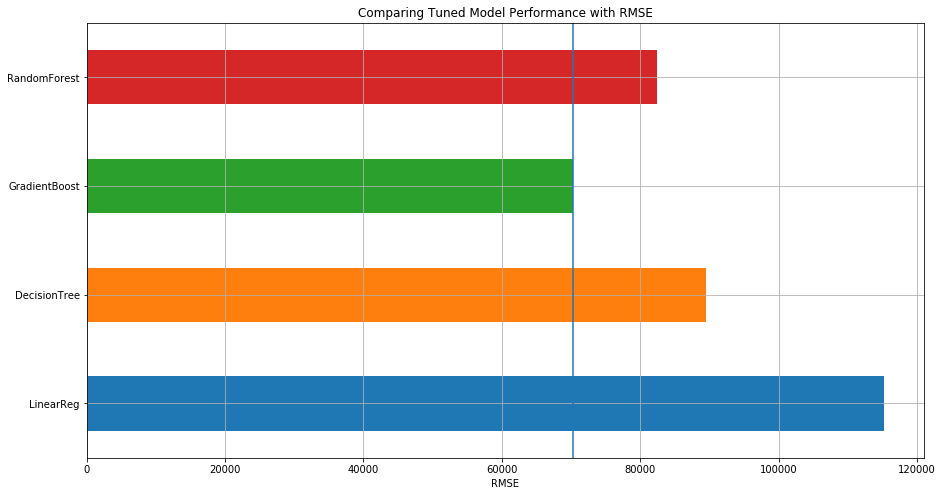

In [151]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
tuned_metrics.loc['rmse'].plot(kind='barh', ax=ax)
ax.axvline(min(tuned_metrics.loc['rmse']))
plt.title('Comparing Tuned Model Performance with RMSE')
plt.xlabel('RMSE')
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization/'+'compareTunedModelPerformanceRMSE_hbarplot.jpg')
plt.savefig(output_path)
ax.grid()

According to the Root Mean Squared Error, Gradient Boost Regression model is the best performing model. 

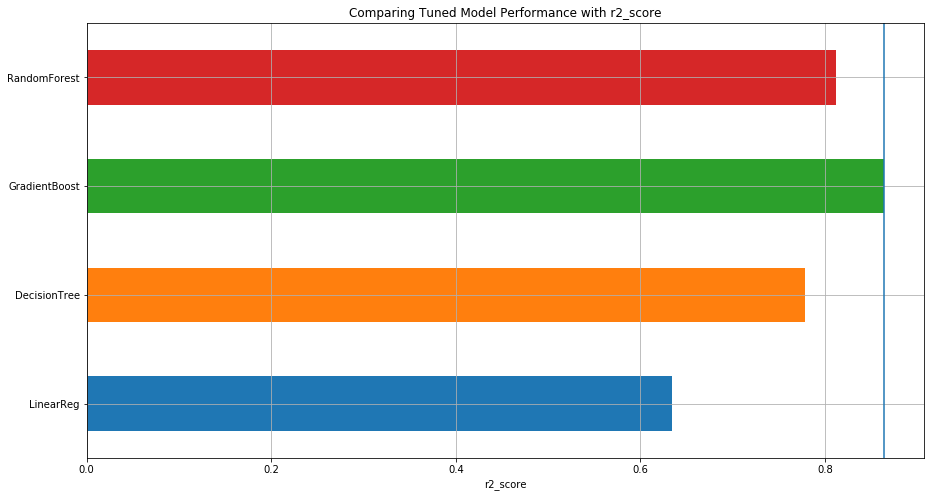

In [152]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
tuned_metrics.loc['r2_score'].plot(kind='barh', ax=ax)
ax.axvline(max(tuned_metrics.loc['r2_score']))
plt.title('Comparing Tuned Model Performance with r2_score')
plt.xlabel('r2_score')
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization/'+'compareTunedModelPerformanceR2_hbarplot.jpg')
plt.savefig(output_path)
ax.grid()

According to the r2_score, Gradient Boost Regression model is the best performing model.

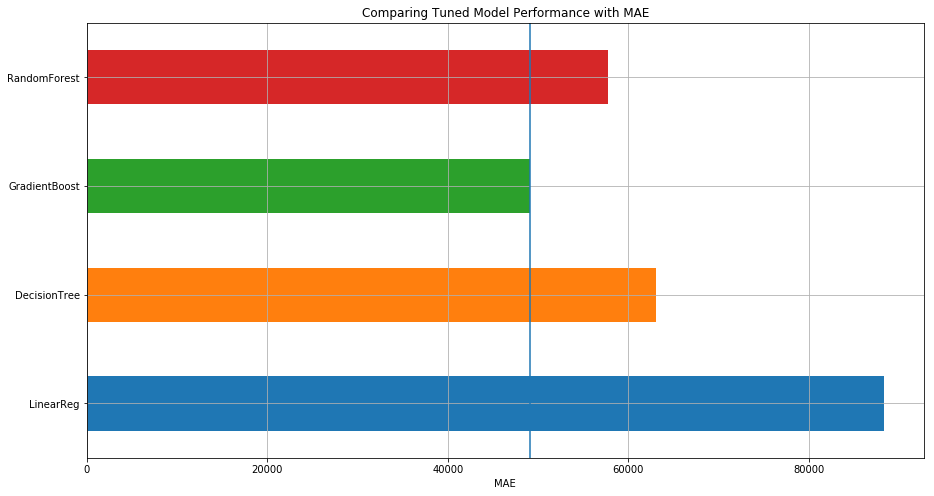

In [153]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
tuned_metrics.loc['mae'].plot(kind='barh', ax=ax)
ax.axvline(min(tuned_metrics.loc['mae']))
plt.title('Comparing Tuned Model Performance with MAE')
plt.xlabel('MAE')
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization/'+'compareTunedModelPerformanceMAE_hbarplot.jpg')
plt.savefig(output_path)
ax.grid()

According to the Mean Absolute Error (MAE), Gradient Boost Regression model is the best performing model.

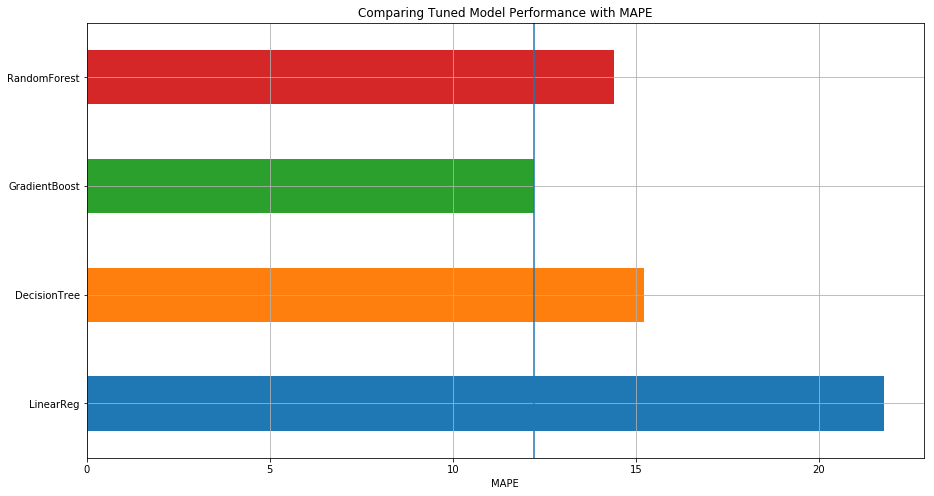

In [154]:
#plot a horizontal bar plot for the metrics of different regressor
fig, ax = plt.subplots(figsize=(15,8))
tuned_metrics.loc['mape'].plot(kind='barh', ax=ax)
ax.axvline(min(tuned_metrics.loc['mape']))
plt.title('Comparing Tuned Model Performance with MAPE')
plt.xlabel('MAPE')
output_path = os.path.join('/Users/lakpa/Desktop/PredictHousePrice/DataVisualization/'+'compareTunedModelPerformanceMAPE_hbarplot.jpg')
plt.savefig(output_path)
ax.grid()

According to the Mean absolute percentage error (MAPE), Gradient Boost Regression model is the best performing model. All of the mertics suggest that Gradient Boosted Regression model is the better performing model for this dataset. 